<h1><center><font size=10>Invitation project task for the position Data Scientist</center></font></h1>

## **Task**

The task consists of coming up with a new recommendation engine component(s) for the Conrad online shop. That is for recommending the customers products that might be interesting to buy together (bundles).

**Source of data:** The e-commerce dataset available at Kaggle, was used this exercise and can be downloaded here >> https://www.kaggle.com/datasets/carrie1/ecommerce-data

## **Data description**

- **InvoiceNo:**	Code representing each unique transaction. If this code starts with letter 'c', it indicates a cancellation.
- **StockCode:**	Code uniquely assigned to each distinct product.
- **Description:**	Description of each product.
- **Quantity:**	The number of units of a product in a transaction.
- **InvoiceDate:**	The date and time of the transaction.
- **UnitPrice:**	The unit price of the product in sterling.
- **CustomerID:**	Identifier uniquely assigned to each customer.
- **Country:**	The country of the customer.

In [ ]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163001 sha256=ca5f183280515cc60db88f22722653018da0c208c8a9d8435097fab7caf8b49b
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
# Mounting the drive in google colab (should be commented out when working on a local machine)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the necessary libraries**

In [ ]:

# Used to ignore the warning given as output of the code
#ignorning the warnings
import warnings
warnings.filterwarnings(action='ignore')

# Suppress DeprecationWarning
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Basic libraries of python for numeric and dataframe computations
import numpy as np
import pandas as pd
import seaborn as sns
# Basic library for data visualization
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap
import plotly.graph_objects as go
from matplotlib import colors as mcolors
from scipy.stats import linregress
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from collections import defaultdict
from sklearn.metrics import mean_squared_error

# Import libraries for building linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
#from sklearn.linear_model import LinearRegression

# Import library for preparing data
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso  # Import methods to build linear model for statistical analysis and prediction
from sklearn.tree import DecisionTreeRegressor                   # Import methods to build decision trees.
from sklearn.ensemble import RandomForestRegressor

### **Importing the Dataset and general data overview**

In [ ]:
# Importing the data set in google colab
df = pd.read_csv('/content/drive/MyDrive/Copilot/Conrad_data.csv', encoding='ISO-8859-1')
# Comment the above code and uncomment the beloow making sure the data is in the same foleder as the current jupyter notebook
# df = pd.read:csv("Conrad_data.csv", encoding='ISO-8859-1') # The 'ISO-8859-1' (also known as 'latin1'), is often used for files containing non-UTF-8 compatible characters.

In [ ]:
# Copying data to another variable to avoid any changes to original data
data = df.copy()

### **View the first and last 5 rows of the dataset**

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


**Observation:**

* The unit prices of the product are indicated by the variable **UnitPrice** is the target variable and the rest of the variables are independent variables based on which we will predict the the unit price of the products.

### **Understanding the shape of the dataset**

In [ ]:
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 541909 rows and 8 columns.


### **Checking the data types of the columns for the dataset**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


**Observations:**
* Quantity, CustomerID and UnitPrice are the numeric columns while the rest are object ones.
* There are a total of **541909 observations in each of the columns**. This indicates that there are **missing values** in the **CustomerID**, and the **Description** data.

### **Checking for missing values in the dataset**

In [ ]:
# checking null values
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

**Observation:**
* The Description and CustomerID fields have **1454** and **135080** missing entries, respectively.

### **Checking for unique and duplicate values in the columns**

In [ ]:
# unique values in the columns
for i in data.columns:
    print(i, data[i].nunique())

InvoiceNo 25900
StockCode 4070
Description 4223
Quantity 722
InvoiceDate 23260
UnitPrice 1630
CustomerID 4372
Country 38


In [ ]:
# check for duplicates
duplicates = data.duplicated()
print("Number of duplicate rows = ", duplicates.sum())

Number of duplicate rows =  5268


In [ ]:
duplicate_rows=data.duplicated(keep=False)
data[duplicate_rows].sort_values(by='InvoiceNo')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
440149,C574510,22360,GLASS JAR ENGLISH CONFECTIONERY,-1,11/4/2011 13:25,2.95,15110.0,United Kingdom
461407,C575940,23309,SET OF 60 I LOVE LONDON CAKE CASES,-24,11/13/2011 11:38,0.55,17838.0,United Kingdom
461408,C575940,23309,SET OF 60 I LOVE LONDON CAKE CASES,-24,11/13/2011 11:38,0.55,17838.0,United Kingdom
529981,C580764,22667,RECIPE BOX RETROSPOT,-12,12/6/2011 10:38,2.95,14562.0,United Kingdom


In [ ]:
# Remove duplicate rows from the dataset
data_no_duplicates = data.drop_duplicates()

# Display the shape of the data before and after removing duplicates to verify
shape_before = data.shape
shape_after = data_no_duplicates.shape

print(f"Shape before removing duplicates: {shape_before}")
print(f"Shape after removing duplicates: {shape_after}")


Shape before removing duplicates: (541909, 8)
Shape after removing duplicates: (536641, 8)


In [ ]:
data_no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536641 non-null  object 
 1   StockCode    536641 non-null  object 
 2   Description  535187 non-null  object 
 3   Quantity     536641 non-null  int64  
 4   InvoiceDate  536641 non-null  object 
 5   UnitPrice    536641 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      536641 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.8+ MB


In [ ]:
# check for missing values
missing_values = data_no_duplicates.isna().sum()
print("Number of missing values in the dataset = ", missing_values.sum())
round(data_no_duplicates.isnull().sum() / data_no_duplicates.isnull().count() * 100, 2)


Number of missing values in the dataset =  136491


InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     25.16
Country         0.00
dtype: float64

In [ ]:
#dropping all the rowns which have Nan values
data_no_duplicates.dropna(subset=['Description','CustomerID'],axis=0,how='any',inplace=True)
data_cleaned = data_no_duplicates
data_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
# Verify the removal by checking the shape of the data before and after
shape_before_cleaning = data.shape
shape_after_cleaning = data_cleaned.shape

(shape_before_cleaning, shape_after_cleaning)

((541909, 8), (401604, 8))

In [ ]:
# check for missing values
missing_values = data_cleaned.isna().sum()
print("Number of missing values in the dataset = ", missing_values.sum())
round(data_cleaned.isnull().sum() / data_cleaned.isnull().count() * 100, 2)

Number of missing values in the dataset =  0


InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

In [ ]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401604 non-null  object 
 1   StockCode    401604 non-null  object 
 2   Description  401604 non-null  object 
 3   Quantity     401604 non-null  int64  
 4   InvoiceDate  401604 non-null  object 
 5   UnitPrice    401604 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      401604 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.6+ MB


**Observations:**
* There are no missing values in the data after the duplicated and missing values are removed.
* The final data is reduced from **541909** to **401604** observations.

In [ ]:
data_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
data_cleaned.shape

(401604, 8)

## **Exploratory Data Analysis (EDA)**

**Descriptive statistics for numeric columns**

In [ ]:
# sumary statistics for both numeric and categorical data
data_cleaned.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
InvoiceNo,401604,22190,576339,542,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,401604,3684,85123A,2065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,401604,3896,WHITE HANGING HEART T-LIGHT HOLDER,2058,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,401604.0,NaN,NaN,NaN,12.183273,250.283037,-80995.0,2.0,5.0,12.0,80995.0
InvoiceDate,401604,20460,11/14/2011 15:27,543,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UnitPrice,401604.0,NaN,NaN,NaN,3.474064,69.764035,0.0,1.25,1.95,3.75,38970.0
CustomerID,401604.0,NaN,NaN,NaN,15281.160818,1714.006089,12346.0,13939.0,15145.0,16784.0,18287.0
Country,401604,37,United Kingdom,356728,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observations:**

- The minimum unit price is **0** and the maximum is **38970.0** indicating there are some errors as unit price can not be zero.
- There are **3896** unique stock codes (products) in the dataset.
- The **WHITE HANGING HEART T-LIGHT HOLDER** is the product that is most ordered.
- majority of the orders are made in the **United Kingdom**
- It doesn't quite feel right for UnitPrice to have zero values.
- Negative quantities usually represent canceled invoices, indicating returns or removals of previously sold or purchased items. Retaining these transactions in the database, flagged as canceled, facilitates record-keeping and preserves transaction history, instead of deleting them.
- The UnitPrice and the Quantity variables have outliers.

## **Analysis of Canceled and Non-Canceled Invoices**

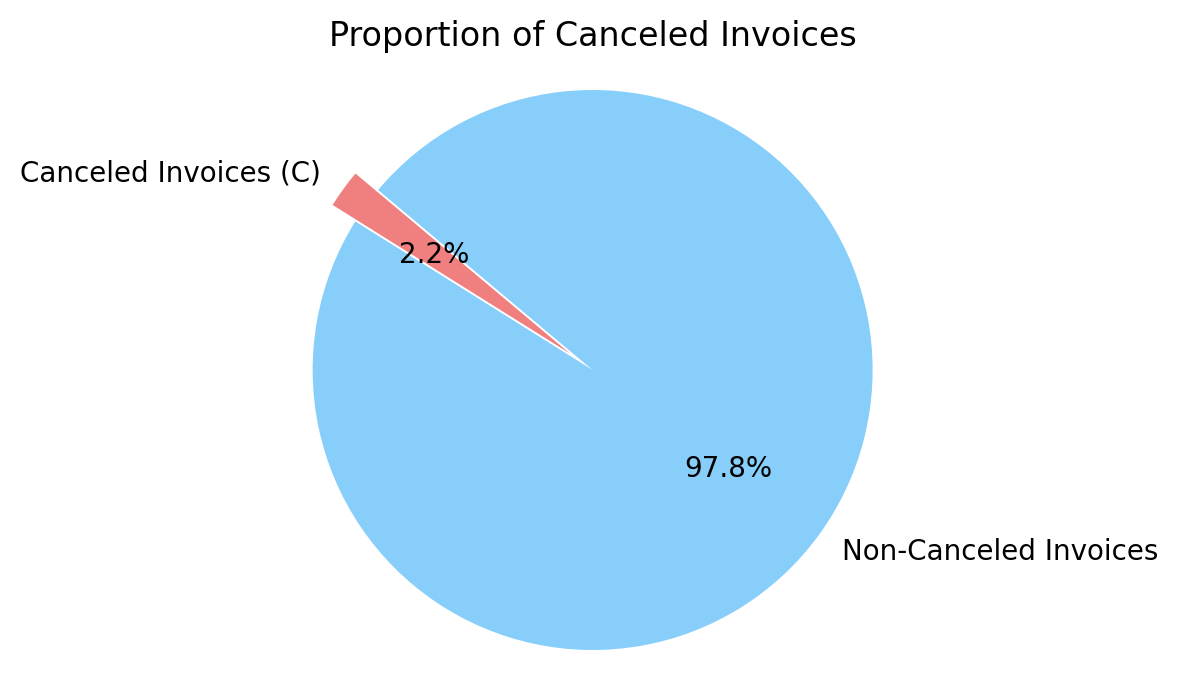

In [ ]:
# Count the occurrences of 'InvoiceNo' starting with 'C'
canceled_invoices = data_cleaned[data_cleaned['InvoiceNo'].str.startswith('C')]['InvoiceNo'].count()

# Count the occurrences of 'InvoiceNo' NOT starting with 'C'
non_canceled_invoices = data_cleaned[~data_cleaned['InvoiceNo'].str.startswith('C')]['InvoiceNo'].count()

# Create a pie chart
labels = ['Canceled Invoices (C)', 'Non-Canceled Invoices']
sizes = [canceled_invoices, non_canceled_invoices]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode the 1st slice (canceled invoices)
plt.figure(figsize=(6, 4), dpi=200)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of Canceled Invoices')

plt.show()

In [ ]:
# Check the number of the canceled and non-canceled invoices
print('Total of Canceled Invoices: ', canceled_invoices)
print('Total of Non-Canceled Invoices: ', non_canceled_invoices)

Total of Canceled Invoices:  8872
Total of Non-Canceled Invoices:  392732


## **Observation:**

- Only 2.2% of the tracsactions representing 8872 were cancelled.

In [ ]:
# Create dataframe of all canceled invoices
df_canceled_invoices = data_cleaned[data_cleaned['InvoiceNo'].str.startswith('C')]
df_canceled_invoices.describe()

,Quantity,UnitPrice,CustomerID
count,8872.000000,8872.000000,8872.000000
mean,-30.774910,18.899512,14990.152953
std,1172.249902,445.190864,1708.230387
min,-80995.000000,0.010000,12346.000000
25%,-6.000000,1.450000,13505.000000
50%,-2.000000,2.950000,14868.000000
75%,-1.000000,4.950000,16393.000000
max,-1.000000,38970.000000,18282.000000


**Finding the countries of the canceled invoces**

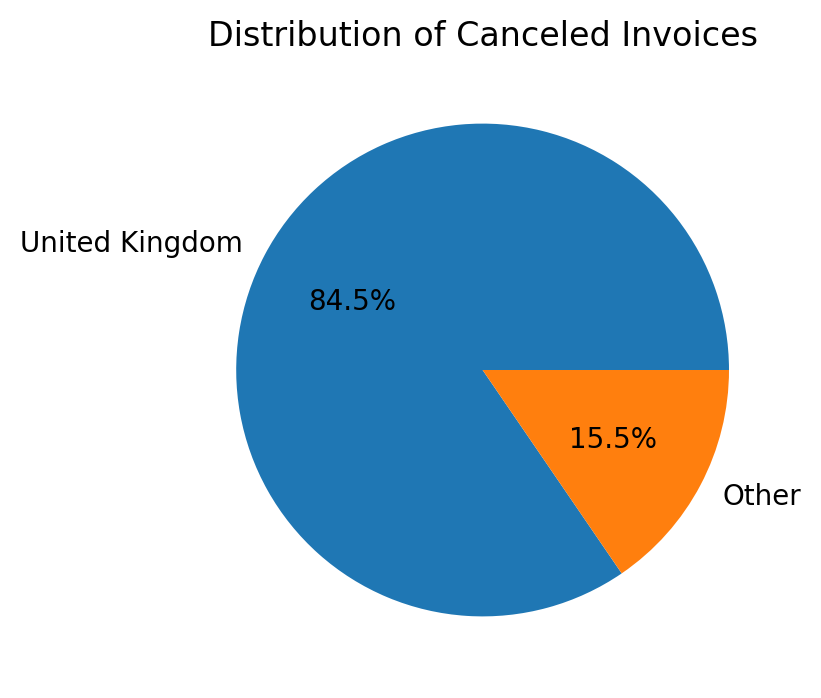

In [ ]:
# Count the occurrences of each country in the 'Country' column
country_counts = df_canceled_invoices['Country'].value_counts()

# Separate UK from other countries
uk_count = country_counts['United Kingdom']
other_countries_count = country_counts.drop('United Kingdom').sum()

# Create a new DataFrame with UK and Other
countries = ['United Kingdom', 'Other']
counts = [uk_count, other_countries_count]

# Plotting a pie chart for UK and Other countries
plt.figure(figsize=(6, 4), dpi=200)
plt.pie(counts, labels=countries, autopct='%1.1f%%')
plt.title('Distribution of Canceled Invoices')
plt.show()

In [ ]:
all_countries = data_cleaned['Country'].unique()
canceled_countries = df_canceled_invoices['Country'].unique()

countries_without_canceled_invoices = [country for country in all_countries if country not in canceled_countries]
countries_without_canceled_invoices

['Lithuania',
 'Iceland',
 'Lebanon',
 'United Arab Emirates',
 'Canada',
 'Unspecified',
 'Brazil',
 'Bahrain',
 'RSA']

## **Observations:**

- The bulk of canceled transactions (84.5%) originate from the United Kingdom.
- The combined total of canceled transactions from the other 37 countries accounts for 15.5%.
- Countries such as Lithuania, Iceland, Lebanon, United Arab Emirates, Canada, Unspecified, Brazil, Bahrain, and the RSA report no canceled transactions.

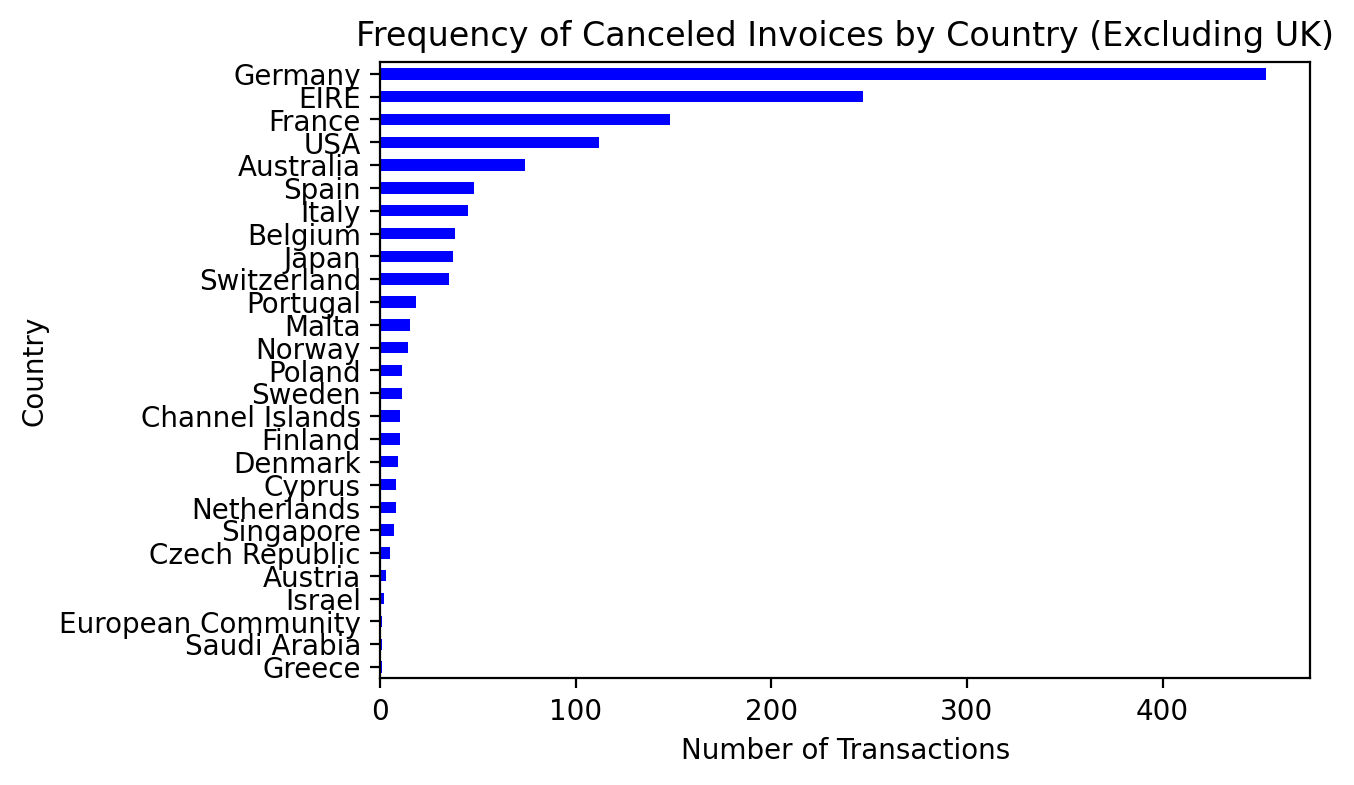

In [ ]:
# Excluding 'United Kingdom' and counting occurrences of each country
country_counts = df_canceled_invoices[df_canceled_invoices['Country'] != 'United Kingdom']['Country'].value_counts()

# Sort the values from the most to the least frequent
country_counts = country_counts.sort_values(ascending=True)

# Create a horizontal bar plot
plt.figure(figsize=(6, 4), dpi=200)

country_counts.plot(kind='barh', figsize=(6, 4), color='blue')
plt.title('Frequency of Canceled Invoices by Country (Excluding UK)')
plt.xlabel('Number of Transactions')
plt.ylabel('Country')
plt.show()

In [ ]:
country_counts

Greece                  1
Saudi Arabia            1
European Community      1
Israel                  2
Austria                 3
Czech Republic          5
Singapore               7
Netherlands             8
Cyprus                  8
Denmark                 9
Finland                10
Channel Islands        10
Sweden                 11
Poland                 11
Norway                 14
Malta                  15
Portugal               18
Switzerland            35
Japan                  37
Belgium                38
Italy                  45
Spain                  48
Australia              74
USA                   112
France                148
EIRE                  247
Germany               453
Name: Country, dtype: int64

## **Observations:**

- The examination of canceled invoices reveals that the United Kingdom experiences the highest number of cancellations, totaling 7,821, which is significantly more than any other country in the analysis.
- Following the UK, Germany, EIRE, France, and the USA have the highest cancellation counts,  with 453, 247, 148, and 112 cancellations, respectively.
- Remarkably, there are no recorded cancellations in several countries, including Lithuania, Iceland, Lebanon, the United Arab Emirates, Canada, Unspecified, Brazil, and RSA. This analysis underscores the uneven distribution of cancellations across countries, highlighting the importance of investigating the reasons behind these regional differences in cancellation rates.

**Finding the StockCode (product Descriptions) of the most canceled invoces**

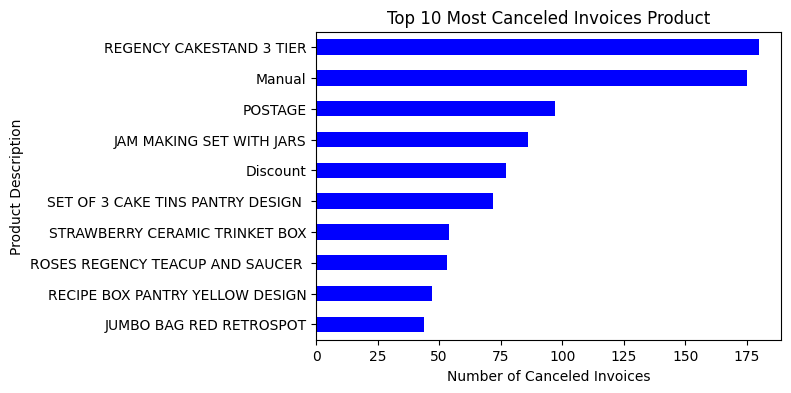

In [ ]:
top_10_canceled_desc = df_canceled_invoices['Description'].value_counts().head(10)
#plt.figure(figsize=(6, 4), dpi=200)

top_10_canceled_desc = top_10_canceled_desc.sort_values(ascending=True)
top_10_canceled_desc.plot(kind='barh', figsize=(6, 4), color='blue')
plt.title('Top 10 Most Canceled Invoices Product')
plt.xlabel('Number of Canceled Invoices')
plt.ylabel('Product Description')
plt.show()

In [ ]:
top_10_canceled_desc

JUMBO BAG RED RETROSPOT               44
RECIPE BOX PANTRY YELLOW DESIGN       47
ROSES REGENCY TEACUP AND SAUCER       53
STRAWBERRY CERAMIC TRINKET BOX        54
SET OF 3 CAKE TINS PANTRY DESIGN      72
Discount                              77
JAM MAKING SET WITH JARS              86
POSTAGE                               97
Manual                               175
REGENCY CAKESTAND 3 TIER             180
Name: Description, dtype: int64

## **Observations:**

- The analysis identifies the top ten product descriptions linked to canceled invoices, highlighting the items most commonly canceled.
- Remarkably, **REGENCY CAKESTAND 3 TIER** leads as the item canceled the most, with **180** occurrences, followed by "Manual" at **185** cancellations.
- Additionally, **"POSTAGE"** and **"JAM MAKING SET WITH JARS"** are significant, with **97** and **86** cancellations, respectively.
- Other notable mentions include **"Discount"**, **"SET OF 3 CAKE TINS PANTRY DESIGN"**, **"ROSES REGENCY TEACUP AND SAUCER"**, **"STRAWBERRY CERAMIC TRINKET BOX"**,  **"RECIPE BOX PANTRY YELLOW DESIGN"**, and **"JUMBO BAG RED RETROSPOT"** all contributing to the list of frequently canceled items.
- This information is crucial for businesses to pinpoint which products are more prone to cancellation and to delve into the factors driving these patterns, whether they be customer dissatisfaction or operational challenges.

In [ ]:
# Create dataframe of all non-canceled invoices
df_non_canceled_invoices = data_cleaned[~data_cleaned['InvoiceNo'].str.startswith('C')]
df_non_canceled_invoices.describe()

,Quantity,UnitPrice,CustomerID
count,392732.000000,392732.000000,392732.000000
mean,13.153718,3.125596,15287.734822
std,181.588420,22.240725,1713.567773
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


## **Country distribution**

In [ ]:
# The number of unique country after data cleaning (overal was 38). Honkon was the country removed
print('Total unique country:', data_cleaned["Country"].nunique())

Total unique country: 37


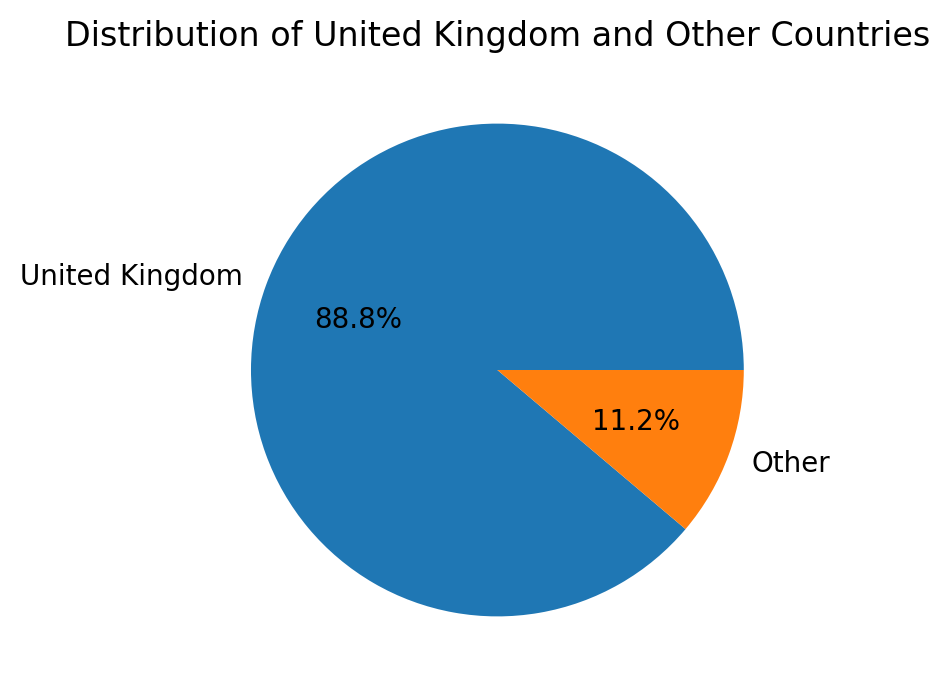

In [ ]:
# Count the occurrences of each country in the 'Country' column
country_counts = data_cleaned['Country'].value_counts()

# Separate UK from other countries
uk_count = country_counts['United Kingdom']
other_countries_count = country_counts.drop('United Kingdom').sum()

# Create a new DataFrame with UK and Other
countries = ['United Kingdom', 'Other']
counts = [uk_count, other_countries_count]

# Plotting a pie chart for UK and Other countries
plt.figure(figsize=(6, 4), dpi = 200)
plt.pie(counts, labels=countries, autopct='%1.1f%%')
plt.title('Distribution of United Kingdom and Other Countries')
plt.show()

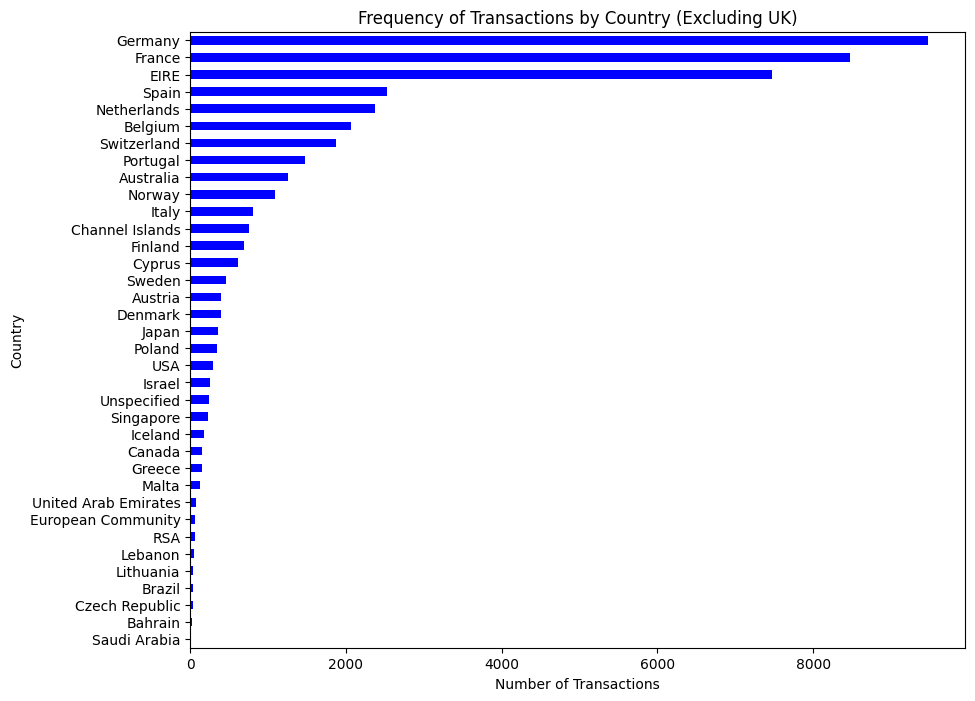

In [ ]:
# Exclude 'United Kingdom' and count occurrences of each country
country_counts = data_cleaned[data_cleaned['Country'] != 'United Kingdom']['Country'].value_counts()

# Sort the values from the most to the least frequent
country_counts = country_counts.sort_values(ascending=True)

# Create a horizontal bar plot
country_counts.plot(kind='barh', figsize=(10, 8), color='blue')
plt.title('Frequency of Transactions by Country (Excluding UK)')
plt.xlabel('Number of Transactions')
plt.ylabel('Country')
plt.show()

In [ ]:
country_counts

Saudi Arabia              10
Bahrain                   17
Czech Republic            30
Brazil                    32
Lithuania                 35
Lebanon                   45
RSA                       58
European Community        61
United Arab Emirates      68
Malta                    127
Greece                   146
Canada                   151
Iceland                  182
Singapore                229
Unspecified              241
Israel                   247
USA                      291
Poland                   341
Japan                    358
Denmark                  389
Austria                  401
Sweden                   461
Cyprus                   611
Finland                  695
Channel Islands          757
Italy                    803
Norway                  1086
Australia               1258
Portugal                1471
Switzerland             1877
Belgium                 2069
Netherlands             2371
Spain                   2528
EIRE                    7475
France        

## **Observations:**

- The dataset delineates the sales distribution among different countries, showcasing the **United Kingdom** as the dominant market with 490,300 transactions.
- **Germany** and **France** are next, with **9,480** and **8,475** transactions, respectively.
- The data clearly shows that sales are heavily concentrated in a select few countries, with a stark contrast in transaction volumes in other regions.
- Such insights into sales distribution are vital for strategic planning, highlighting the main market and identifying opportunities for business growth or focused marketing strategies.


## **Unit price distribution**

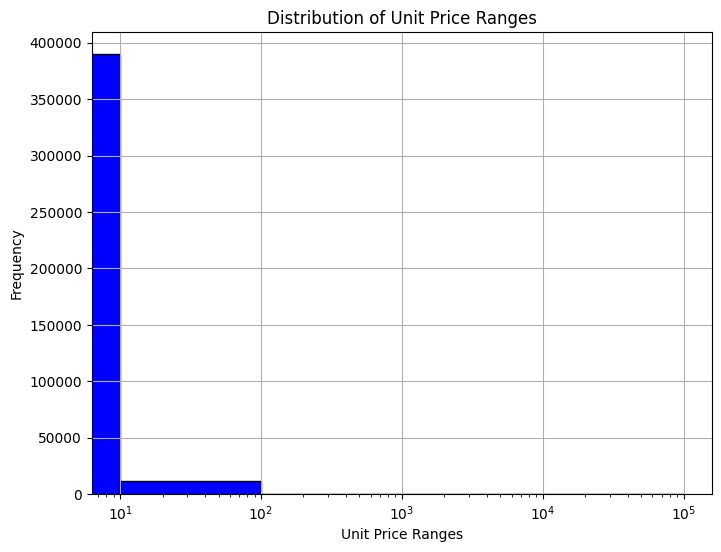

In [ ]:
# Define the bins for grouping the unit prices
bins = [0, 10, 100, 1000, 10000, 100000]

# Plotting a histogram with grouped unit prices
plt.figure(figsize=(8, 6))
plt.hist(data_cleaned['UnitPrice'], bins=bins, color='blue', edgecolor='black')
plt.xscale('log')
plt.title('Distribution of Unit Price Ranges')
plt.xlabel('Unit Price Ranges')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
# Define the bins for grouping the unit prices
bins = [0, 10, 100, 1000, 10000, 100000]

# Get the frequency counts for each bin
frequency, _ = np.histogram(data_cleaned['UnitPrice'], bins=bins)

# Display the frequency count for each bin
for i, freq in enumerate(frequency):
    print(f"Unit price {bins[i]} - {bins[i+1]} sterling: {freq}")

Unit price 0 - 10 sterling: 389911
Unit price 10 - 100 sterling: 11391
Unit price 100 - 1000 sterling: 256
Unit price 1000 - 10000 sterling: 45
Unit price 10000 - 100000 sterling: 1


## **Observations:**

- The analysis reveals a pronounced clustering of transactions within the 0 to 10 sterling price bracket, accounting for **389911** instances.
- As the transaction values escalate, there's a marked drop in frequency, with the 10 to 100 sterling bracket seeing only **11391** transactions.
- This trend continues, with **256** transactions occurring within the 100 to 1,000 sterling range, and a further decrease to **45** transactions for the 1,000 to 10,000 sterling range.
- At the highest price bracket of 10,000 to 100,000 sterling, there are merely **1** transactions.
- This pattern highlights a dominant preference for lower-priced transactions, with a significant reduction in transaction frequency corresponding with higher price levels, indicating that higher-priced transactions are relatively rare in the dataset.

## **Analysis of Countries without cancelled invoices**

In [ ]:
# Filtering the main DataFrame for entries matching countries without canceled invoices
df_countries_without_canceled = data_cleaned[data_cleaned['Country'].isin(countries_without_canceled_invoices)]
df_countries_without_canceled.describe()

,Quantity,UnitPrice,CustomerID
count,829.000000,829.000000,829.000000
mean,12.055489,3.871122,14044.522316
std,23.419495,19.309747,2096.642647
min,1.000000,0.000000,12347.000000
25%,4.000000,1.250000,12363.000000
50%,10.000000,2.080000,12743.000000
75%,12.000000,4.150000,16320.000000
max,504.000000,550.940000,17844.000000


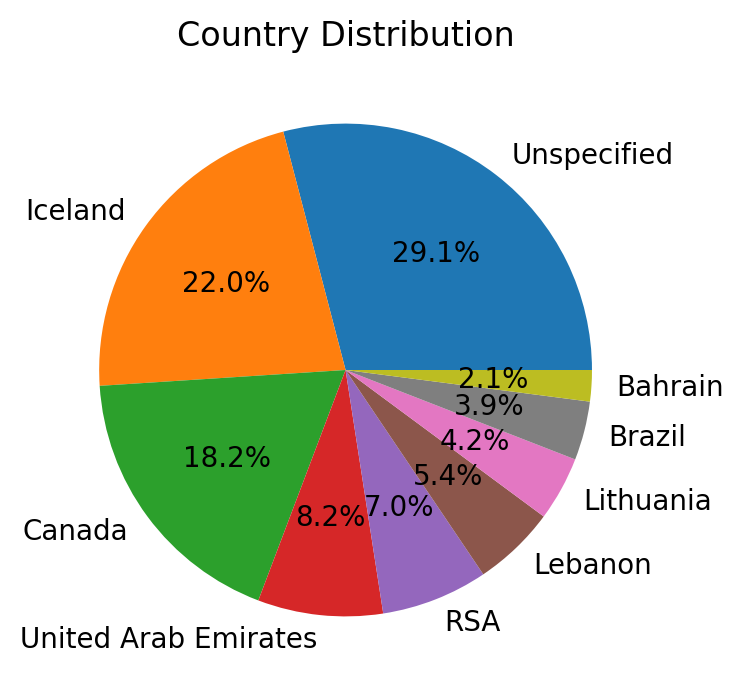

In [ ]:
# Count the occurrences of each country in the DataFrame
country_counts = df_countries_without_canceled['Country'].value_counts()

# Plotting the pie chart for country distribution
plt.figure(figsize=(6, 4), dpi = 200)
country_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Country Distribution')
plt.ylabel('')  # Remove the label for the y-axis
plt.show()

## **Observations:**

- The pie chart illustrating the distribution of countries in the dataset, particularly focusing on those with no canceled invoices, demonstrates a dominant share of "Unspecified" at 29.1%.
- "Iceland" comes next with an 22.0% share, followed by "Canada" at 18.2%. Subsequent shares include "United Arab Emirates" at 8.2%, "RSA" at 7.0%, and "Lebanon" at 5.4%.
- "Lithuania" and "Brazil" are among the least represented, with 4.2% and 3.9% shares, respectively.

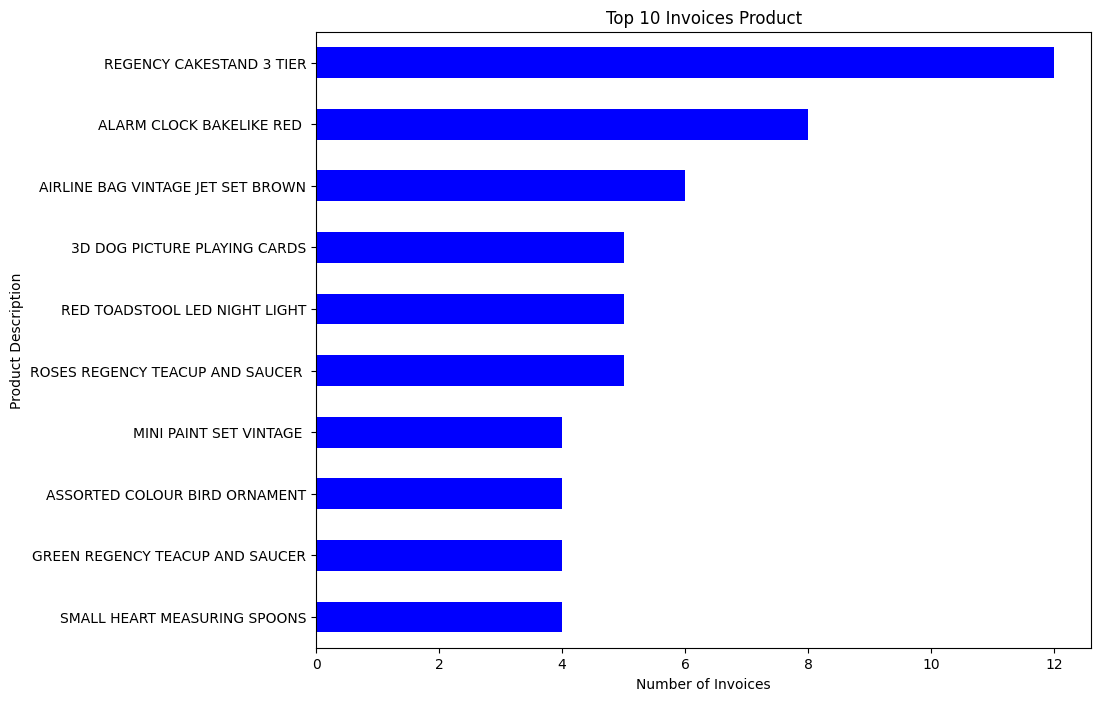

In [ ]:
top_10_product = df_countries_without_canceled['Description'].value_counts().head(10)

top_10_product = top_10_product.sort_values(ascending=True)
top_10_product.plot(kind='barh', figsize=(10, 8), color='blue')
plt.title('Top 10 Invoices Product')
plt.xlabel('Number of Invoices')
plt.ylabel('Product Description')
plt.show()

In [ ]:
top_10_product

SMALL HEART MEASURING SPOONS          4
GREEN REGENCY TEACUP AND SAUCER       4
ASSORTED COLOUR BIRD ORNAMENT         4
MINI PAINT SET VINTAGE                4
ROSES REGENCY TEACUP AND SAUCER       5
RED TOADSTOOL LED NIGHT LIGHT         5
3D DOG PICTURE PLAYING CARDS          5
AIRLINE BAG VINTAGE JET SET BROWN     6
ALARM CLOCK BAKELIKE RED              8
REGENCY CAKESTAND 3 TIER             12
Name: Description, dtype: int64

## **Observations:**

- In the dataset of countries without canceled invoices, the list of the top 10 most frequently ordered products highlights a variety of favored items.
- Leading the chart, the **"REGENCY CAKESTAND 3 TIER"** stands out with **12** orders, underscoring its popularity.
- Following closely is the **"ALARM CLOCK BAKELIKE RED"** with **8** orders, showcasing its significant appeal.
- Additionally, items like the **"AIRLINE BAG VINTAGE JET SET BROWN"**, **"3D DOG PICTURE PLAYING CARDS"**, and **"RED TOADSTOOL LED NIGHT LIGHT"**, and , each garnering between **5** orders, indicate a steady demand.

## **Dealing with noise in some of the data columns**


In this attempt, I focused on cleaning the columns due to the presence of negative values in the quantity. Additionally, it was noted that some stock codes begin with the letter 'C', potentially indicating a canceled transaction.

In [ ]:
# Analysis of negative values in Quantity and UnitPrice columns
data_cleaned[data_cleaned['Quantity'] < 0].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,12/1/2010 10:24,3.45,17548.0,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,12/1/2010 10:24,1.65,17548.0,United Kingdom
939,C536506,22960,JAM MAKING SET WITH JARS,-6,12/1/2010 12:38,4.25,17897.0,United Kingdom


In [ ]:
data_cleaned[data_cleaned['Quantity'] < 0].shape

(8872, 8)

## **Observations:**

Numerous transactions exhibit these characteristics. Without direct access to the owners for further clarification on the negative values, we rely on insights from Kaggle's Discussion forums, where users have proposed that these negative figures likely denote returned or canceled items—a plausible explanation for the observed data patterns.

In [ ]:
display(data_cleaned[data_cleaned['Quantity'] < 0]['InvoiceNo'].head(100).unique())

array(['C536379', 'C536383', 'C536391', 'C536506', 'C536543', 'C536548',
       'C536606', 'C536622', 'C536625', 'C536642', 'C536734', 'C536737',
       'C536757', 'C536758', 'C536760', 'C536807', 'C536812', 'C536814',
       'C536815', 'C536816', 'C536817', 'C536818', 'C536820', 'C536822',
       'C536825', 'C536826', 'C536827', 'C536828', 'C536829', 'C536850',
       'C536853', 'C536854', 'C536855', 'C536978', 'C536979', 'C537024',
       'C537039', 'C537043', 'C537132', 'C537143', 'C537157', 'C537164',
       'C537203'], dtype=object)

## **Observation:**

It becomes clear that most of the rows with negative quantity values have an Invoice number that starts with "C"?

In [ ]:
data_cleaned[(data_cleaned['InvoiceNo'].str[0] != 'C') & (df['Quantity'] < 0)]['InvoiceNo'].head()

Series([], Name: InvoiceNo, dtype: object)

In [ ]:
data_cleaned[(data_cleaned['InvoiceNo'].str[0] == 'C') & (df['Quantity'] > 0)]['InvoiceNo'].head()

Series([], Name: InvoiceNo, dtype: object)

For all rows where Quantity is less than 0, the invoice number starts with "C". It seems these really are "Cancelled" transactions.

In [ ]:
display(data_cleaned[data_cleaned['Quantity'] < 0]['StockCode'].head(100).unique())

array(['D', '35004C', '22556', '21984', '21983', '21980', '21484',
       '22557', '22553', '22960', '22632', '22355', '22244', '22242',
       '20914', '22892', '22654', '22767', '22333', '22245', '22077',
       '22631', '22168', '21218', '20957', '22580', '22752', '22839',
       '21463', '22780', '85048', '22798', '84347', '21314', '22175',
       '22273', '22501', '22778', '22578', '22574', '22593', '22595',
       '22588', '22130', '21527', '72799E', '85066', '21586', '21258',
       '85175', '22178', '21129', '22187', '71477', '84947', '22877',
       '22869', '22878', '21843', '22847', '21430', '22617', '22197',
       '35004B', '22832', '84946', '22942', '22689', '22591', '22186',
       '84678', '22158', '22944', '21871', '22776', '84685', '22630',
       '20893', '22854', '20936', '22575', '11001', '22788', '22184',
       '71279', '22761', '22769', '22762', '20685', '35953', '37449',
       '21424'], dtype=object)

## **Observation:**
The majority of Stock Codes consist of 5 characters. We will now examine the anomalies more closely.



In [ ]:
data_cleaned[(data_cleaned['StockCode'].str.len() != 5) & (data_cleaned['Quantity'] < 0)]['StockCode'].head(20)

141           D
154      35004C
4877     72799E
4939     35004B
4940     35004B
9038          D
13052      POST
14498         D
14524    85099B
14529    85123A
17987    16202E
18196    35004C
19392         D
19430    84406B
19447    79066K
21467    85099B
21516    84625C
21624    72807C
21626    84798A
21747    47594A
Name: StockCode, dtype: object

In [ ]:
data_cleaned[(data_cleaned['StockCode'].str.len() == 6) & (data_cleaned['Quantity'] < 0)].sort_values(by='StockCode').head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
206138,C554905,15044A,PINK PAPER PARASOL,-1,5/27/2011 11:17,2.95,14191.0,United Kingdom
206137,C554905,15044B,BLUE PAPER PARASOL,-1,5/27/2011 11:17,2.95,14191.0,United Kingdom
287975,C562124,15044C,PURPLE PAPER PARASOL,-2,8/2/2011 17:23,2.55,13081.0,United Kingdom
206136,C554905,15044C,PURPLE PAPER PARASOL,-1,5/27/2011 11:17,2.95,14191.0,United Kingdom
199714,C554100,15044D,RED PAPER PARASOL,-1,5/22/2011 13:27,2.95,15555.0,United Kingdom
456093,C575670,15044D,RED PAPER PARASOL,-1,11/10/2011 15:02,2.55,13081.0,United Kingdom
281668,C561588,15056N,EDWARDIAN PARASOL NATURAL,-2,7/28/2011 10:53,5.95,15781.0,United Kingdom
38460,C539576,15056N,EDWARDIAN PARASOL NATURAL,-6,12/20/2010 12:25,5.95,14911.0,EIRE
94803,C544416,15056N,EDWARDIAN PARASOL NATURAL,-2,2/18/2011 15:11,5.95,16713.0,United Kingdom
375975,C569490,15056N,EDWARDIAN PARASOL NATURAL,-33,10/4/2011 13:15,5.95,12457.0,Cyprus


## **Observation:**

Stock Codes that include letters appear to represent different variants of the same item. We'll confirm this assumption by focusing on entries with quantities greater than 0.


In [ ]:
data_cleaned[(data_cleaned['StockCode'].str.len() == 6) & (data_cleaned['Quantity'] > 0)].sort_values(by='StockCode').head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
109611,545655,10123C,HEARTS WRAPPING TAPE,3,3/4/2011 13:58,0.65,14670.0,United Kingdom
140929,548491,10123C,HEARTS WRAPPING TAPE,1,3/31/2011 13:14,0.65,14064.0,United Kingdom
5451,536863,10123C,HEARTS WRAPPING TAPE,1,12/3/2010 11:19,0.65,17967.0,United Kingdom
135094,547881,10124A,SPOTS ON RED BOOKCOVER TAPE,1,3/27/2011 16:08,0.42,13110.0,United Kingdom
12492,537382,10124A,SPOTS ON RED BOOKCOVER TAPE,4,12/6/2010 13:13,0.42,16710.0,United Kingdom
123794,546913,10124A,SPOTS ON RED BOOKCOVER TAPE,4,3/17/2011 20:18,0.42,15861.0,United Kingdom
84458,543397,10124A,SPOTS ON RED BOOKCOVER TAPE,3,2/8/2011 10:32,0.42,17859.0,United Kingdom
443058,574686,10124A,SPOTS ON RED BOOKCOVER TAPE,4,11/6/2011 13:00,0.42,17608.0,United Kingdom
3973,536742,10124G,ARMY CAMO BOOKCOVER TAPE,5,12/2/2010 13:14,0.42,16916.0,United Kingdom
123793,546913,10124G,ARMY CAMO BOOKCOVER TAPE,4,3/17/2011 20:18,0.42,15861.0,United Kingdom


In [ ]:
data_cleaned[(data_cleaned['StockCode'].str.len() < 5) & (data_cleaned['Quantity'] < 0)]['StockCode'].unique()

array(['D', 'POST', 'M', 'C2', 'CRUK'], dtype=object)

In [ ]:
data_cleaned[(data_cleaned['StockCode'].str.len() < 5) & (data_cleaned['Quantity'] > 0)]['StockCode'].unique()

array(['POST', 'C2', 'M', 'PADS', 'DOT'], dtype=object)

In [ ]:
data_cleaned[(data_cleaned['StockCode'].str.len() < 5)]['StockCode'].count()

1903

In [ ]:
data_cleaned[(data_cleaned['StockCode'].str.len() > 6)]['StockCode'].count()

308

## **Observation:**

Transactions featuring Stock Codes not adhering to the 5 or 6-character length are minimal. Given their scarcity, it's reasonable to exclude them from the dataset without significant impact.

In [ ]:
remove_Les_5 = data_cleaned[data_cleaned['StockCode'].str.len() < 5]['StockCode'].unique()

In [ ]:
remove_Gre_6 = data_cleaned[data_cleaned['StockCode'].str.len() > 6]['StockCode'].unique()

In [ ]:
remove = np.concatenate((remove_Les_5, remove_Gre_6))
remove = np.unique(remove)

In [ ]:
data_cleaned = data_cleaned[~data_cleaned['StockCode'].isin(remove)]

In [ ]:
# Getting the number of rows in the dataframe
data_cleaned.shape[0]

399393

**As we have identified the rows with cancelled transaction, let us create a "Transaction Status" column with "Completed" and "cancelled"**

In [ ]:
# Filter out the rows with InvoiceNo starting with "C" and create a new column indicating the transaction status
data_cleaned['Transaction_Status'] = np.where(data_cleaned['InvoiceNo'].astype(str).str.startswith('C'), 'Cancelled', 'Completed')

# Analyze the characteristics of these rows (considering the new column)
cancelled_transactions = data_cleaned[data_cleaned['Transaction_Status'] == 'Cancelled']
cancelled_transactions.describe().drop('CustomerID', axis=1)

,Quantity,UnitPrice
count,8501.000000,8501.000000
mean,-31.476415,4.439495
std,1197.403070,9.201798
min,-80995.000000,0.030000
25%,-6.000000,1.450000
50%,-2.000000,2.550000
75%,-1.000000,4.950000
max,-1.000000,295.000000


In [ ]:
data_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Completed
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed


<Axes: title={'center': 'Bar Chart Example'}, xlabel='Index', ylabel='Values'>

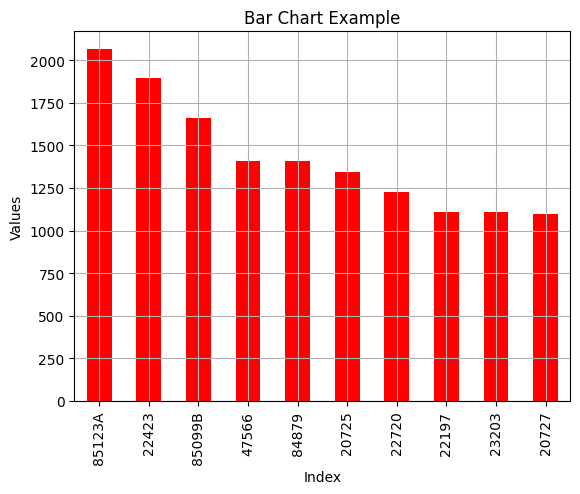

In [ ]:
#top 10 popular stocks
top10stock = data_cleaned['StockCode'].value_counts().head(10)
top10stock.plot(
    kind='bar',    # Change plot type to bar chart
    title='Bar Chart Example',
    xlabel='Index',
    ylabel='Values',
    color='red',  # Change bar color
    grid=True       # Display grid
)

In [ ]:
top10stock

85123A    2065
22423     1894
85099B    1659
47566     1409
84879     1405
20725     1346
22720     1224
22197     1110
23203     1108
20727     1099
Name: StockCode, dtype: int64

**Now we investigate the transactions with 0 unit price**

In [ ]:
data_cleaned['UnitPrice'].describe()

count    399393.000000
mean          2.905248
std           4.452755
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max         649.500000
Name: UnitPrice, dtype: float64

In [ ]:
data_cleaned[data_cleaned['UnitPrice']==0].describe()[['Quantity']]

,Quantity
count,33.000000
mean,420.515152
std,2176.713608
min,1.000000
25%,2.000000
50%,11.000000
75%,36.000000
max,12540.000000


## **Observations:**

- The dataset contains 33 instances where the unit price is zero, which could indicate transactions involving discounts, coupon use, or data entry errors.
- Considering the minimal count of such transactions, it's advisable to eliminate them from the dataset.

In [ ]:
# Removing records with a unit price of zero to avoid potential data entry errors
data_cleaned = data_cleaned[data_cleaned['UnitPrice'] > 0]

In [ ]:
# Standardize the text to uppercase to maintain uniformity across the dataset
data_cleaned['Description'] = data_cleaned['Description'].str.upper()

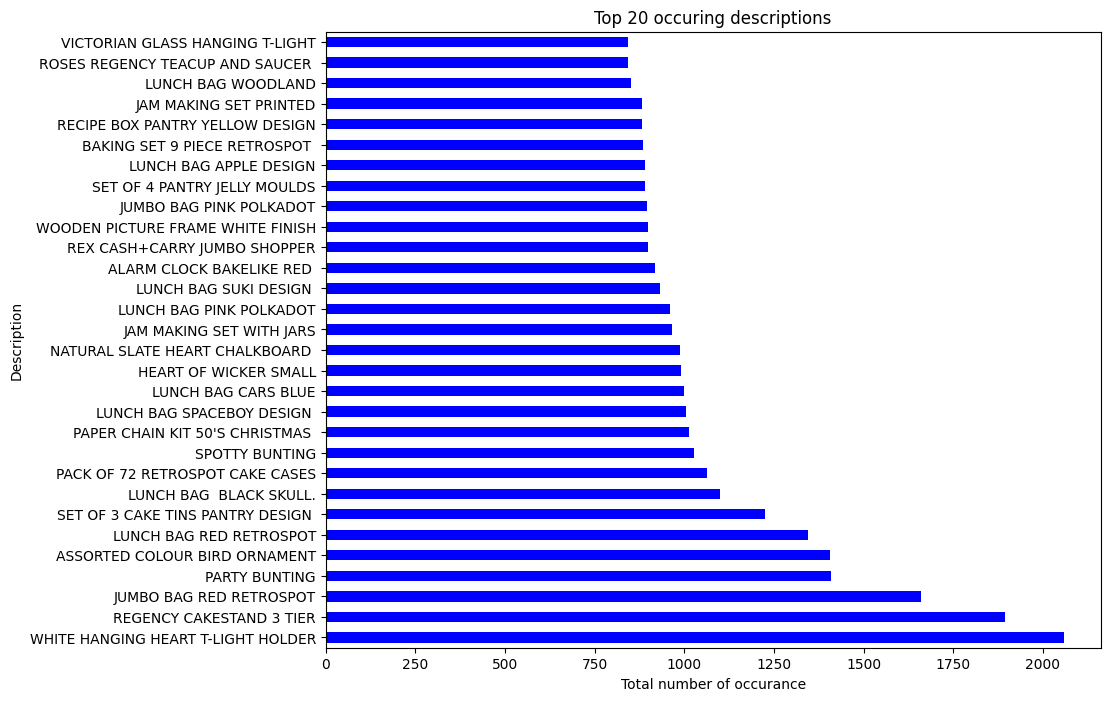

In [ ]:
# Calculate the occurrence of each unique description and sort them. get the top 30 descriptions and plot a bar chart
plt.figure(figsize=(10, 8))
data_cleaned['Description'].value_counts().sort_values(ascending=False).head(30).plot(kind='barh', color = "blue")
plt.title('Top 20 occuring descriptions')
plt.xlabel('Total number of occurance')
plt.ylabel('Description')
plt.show()

In [ ]:
# Resetting the index of the cleaned dataset
data_cleaned.reset_index(drop=True, inplace=True)

In [ ]:
# Getting the number of rows in the dataframe
data_cleaned.shape[0]

399360

In [ ]:
data_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Completed
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed


## **Conducting Feature Engineering**

**Calculating most recent purchase per customer**

In [ ]:
data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate'])

data_cleaned['InvoiceDay'] = data_cleaned['InvoiceDate'].dt.date

# Find the most recent purchase date for each customer
customer_data = data_cleaned[data_cleaned['Transaction_Status'] == 'Completed'].groupby('CustomerID')['InvoiceDay'].max().reset_index()

# Find the most recent date in the entire dataset
most_recent_date = data_cleaned[data_cleaned['Transaction_Status'] == 'Completed']['InvoiceDay'].max()

# Convert InvoiceDay to datetime type before subtraction
customer_data['InvoiceDay'] = pd.to_datetime(customer_data['InvoiceDay'])
most_recent_date = pd.to_datetime(most_recent_date)

# Calculate the number of days since the last purchase for each customer
data_cleaned['Days_Since_Last_Purchase'] = (most_recent_date - customer_data['InvoiceDay']).dt.days

# Remove the InvoiceDay column
data_cleaned.drop(columns=['InvoiceDay'], inplace=True)

data_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status,Days_Since_Last_Purchase
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed,325.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed,75.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,18.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,310.0


In [ ]:
data_cleaned.shape

(399360, 10)

In [ ]:
data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate'])

data_cleaned['year'] = data_cleaned['InvoiceDate'].dt.year
data_cleaned['month'] = data_cleaned['InvoiceDate'].dt.month
data_cleaned['day'] = data_cleaned['InvoiceDate'].dt.day
#data_cleaned['hour'] = data_cleaned['InvoiceDate'].dt.hour
#data_cleaned['minute'] = data_cleaned['InvoiceDate'].dt.minute
data_cleaned.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status,Days_Since_Last_Purchase,year,month,day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed,325.0,2010,12,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2.0,2010,12,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed,75.0,2010,12,1


## **Country where the transaction occured**

To streamline the dataset and enhance model training efficiency, we shall convert the existing column to a binary one, distinguishing between IS_UK and NOT_UK. Given that a significant portion of the data originates from the UK, this approach will help maintain accuracy while potentially reducing model training time.

In [ ]:
data_cleaned['Country'].value_counts(normalize=True)

United Kingdom          0.891068
Germany                 0.022696
France                  0.020368
EIRE                    0.018414
Spain                   0.006165
Netherlands             0.005824
Belgium                 0.004928
Switzerland             0.004610
Portugal                0.003573
Australia               0.003135
Norway                  0.002649
Italy                   0.001961
Channel Islands         0.001883
Finland                 0.001633
Cyprus                  0.001522
Sweden                  0.001092
Austria                 0.000964
Denmark                 0.000939
Japan                   0.000889
Poland                  0.000834
USA                     0.000729
Israel                  0.000618
Unspecified             0.000603
Singapore               0.000538
Iceland                 0.000456
Canada                  0.000376
Greece                  0.000356
Malta                   0.000308
United Arab Emirates    0.000168
European Community      0.000145
RSA       

In [ ]:
# Create a binary column indicating whether the customer is from the UK or not
data_cleaned['Is_UK'] = data_cleaned['Country'].apply(lambda x: 1 if x == 'United Kingdom' else 0)

data_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status,Days_Since_Last_Purchase,year,month,day,Is_UK
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed,325.0,2010,12,1,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2.0,2010,12,1,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed,75.0,2010,12,1,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,18.0,2010,12,1,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,310.0,2010,12,1,1


## **Other features considered for engineering**

To perform feature engineering on the final cleansed data and include the four highly recommended features (TotalTransactionAmount, ItemCount, ProductPurchaseFrequency, and AverageItemPrice per transaction), we'll follow these steps in Python using pandas.

These features provide valuable insights into transaction sizes, product popularity, and pricing patterns, which can be instrumental for developing a product bundle recommendation system and other related tasks

- TotalTransactionAmount: The total amount spent per invoice (Quantity * UnitPrice).
- ItemCount: The number of items in each transaction.
- ProductPurchaseFrequency: The frequency of each product's purchase across all transactions.
- AverageItemPrice: The average price of items per transaction

In [ ]:
# Step 1: Calculate TotalTransactionAmount
data_cleaned['TotalTransactionAmount'] = data_cleaned['Quantity'] * data_cleaned['UnitPrice']

# Step 2: Calculate ItemCount per transaction
item_count_per_invoice = data_cleaned.groupby('InvoiceNo').size().reset_index(name='ItemCount')
data_cleaned = data_cleaned.merge(item_count_per_invoice, on='InvoiceNo', how='left')

# Step 3: Calculate ProductPurchaseFrequency
product_purchase_frequency = data_cleaned['StockCode'].value_counts().reset_index()
product_purchase_frequency.columns = ['StockCode', 'ProductPurchaseFrequency']
data_cleaned = data_cleaned.merge(product_purchase_frequency, on='StockCode', how='left')

# Step 4: Calculate AverageItemPrice per transaction
data_cleaned['AverageItemPrice'] = data_cleaned.groupby('InvoiceNo')['UnitPrice'].transform('mean')

data_cleaned.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status,Days_Since_Last_Purchase,year,month,day,Is_UK,TotalTransactionAmount,ItemCount,ProductPurchaseFrequency,AverageItemPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed,325.0,2010,12,1,1,15.30,7,2065,3.91
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2.0,2010,12,1,1,20.34,7,266,3.91


In [ ]:
data_cleaned.shape

(399360, 18)

In [ ]:
# delete two columns from a dataframe. These are of no relevance now
data_cleaned = data_cleaned.drop(['InvoiceDate', 'Country'], axis=1)

In [ ]:
data_cleaned.head(3)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Transaction_Status,Days_Since_Last_Purchase,year,month,day,Is_UK,TotalTransactionAmount,ItemCount,ProductPurchaseFrequency,AverageItemPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,Completed,325.0,2010,12,1,1,15.30,7,2065,3.91
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,Completed,2.0,2010,12,1,1,20.34,7,266,3.91
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,Completed,75.0,2010,12,1,1,22.00,7,249,3.91


In [ ]:
# Summary statistics for numeric columns for all new data including the engineered ones.
numeric_summary = data_cleaned.describe()

# Summary statistics for categorical columns - include 'object' to specify categorical data
categorical_summary = data_cleaned.describe(include=['object'])

# Display the summary statistics for numeric columns
print("Summary Statistics for Numeric Columns:")
print(numeric_summary)

# Display the summary statistics for categorical columns
print("\nSummary Statistics for Categorical Columns:")
print(categorical_summary)

Summary Statistics for Numeric Columns:
            Quantity      UnitPrice     CustomerID  Days_Since_Last_Purchase  \
count  399360.000000  399360.000000  399360.000000               4334.000000   
mean       12.198077       2.905488   15289.127419                 92.226581   
std       250.154391       4.452860    1710.835261                100.175327   
min    -80995.000000       0.030000   12346.000000                  0.000000   
25%         2.000000       1.250000   13959.000000                 17.000000   
50%         5.000000       1.950000   15152.000000                 50.000000   
75%        12.000000       3.750000   16791.000000                142.000000   
max     80995.000000     649.500000   18287.000000                373.000000   

                year          month            day          Is_UK  \
count  399360.000000  399360.000000  399360.000000  399360.000000   
mean     2010.934380       7.596452      15.037452       0.891068   
std         0.247617       3.417

## **Dealing with outliers in the data**

In [ ]:
# ploting a box plot for data frame with three numerical columns to check for potential outliers
def plot_box(data):
    for column in data.columns:
        if data[column].dtype != object:
            plt.figure(figsize=(10, 5))
            sns.boxplot(data[column])
            plt.title(f'Boxplot of {column}')
            plt.show()

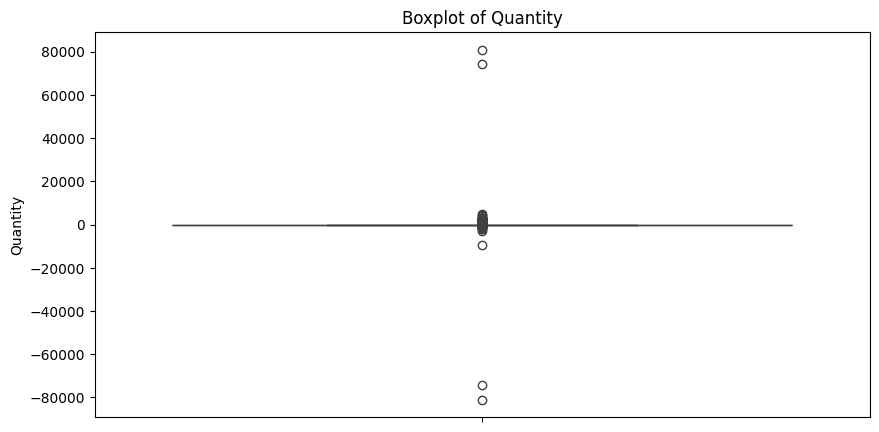

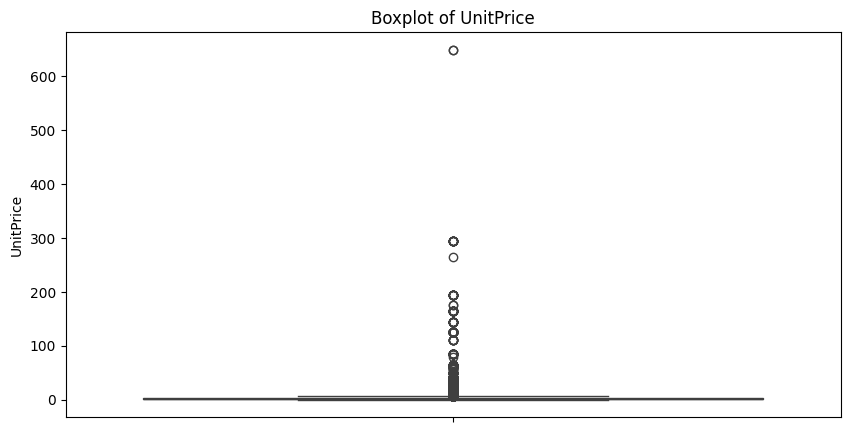

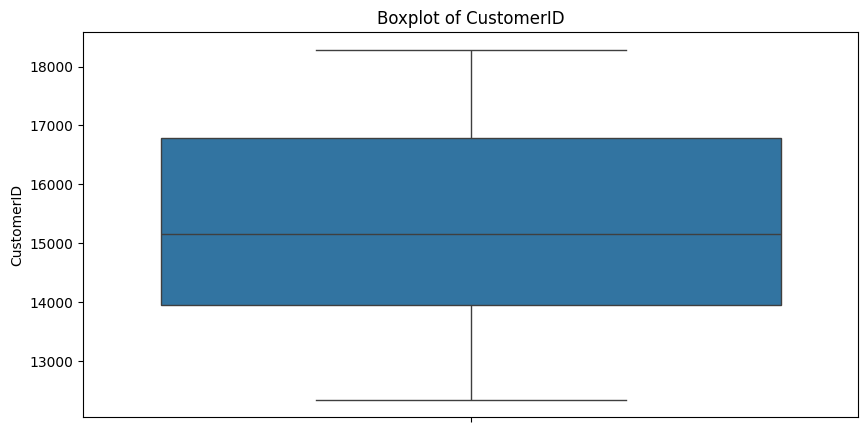

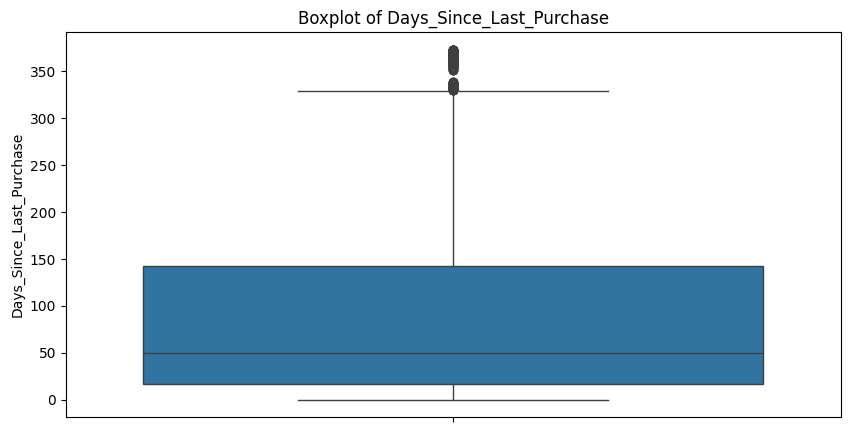

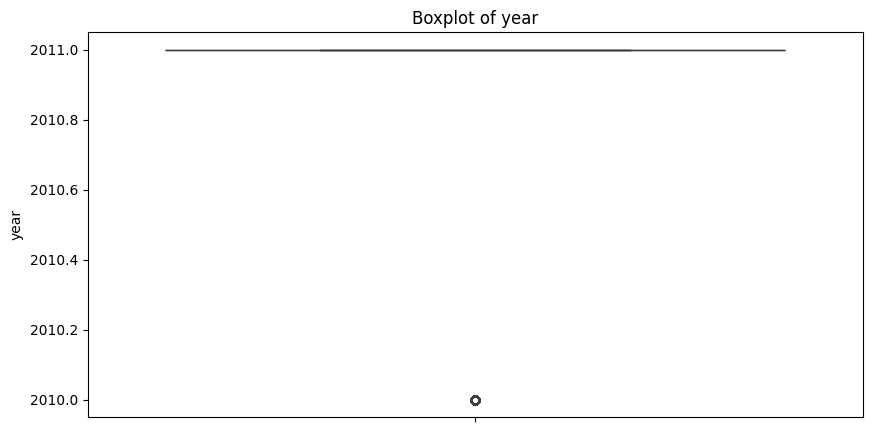

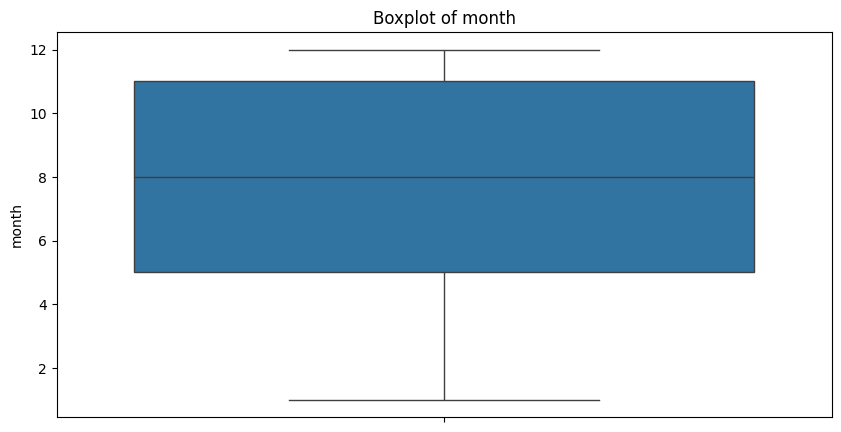

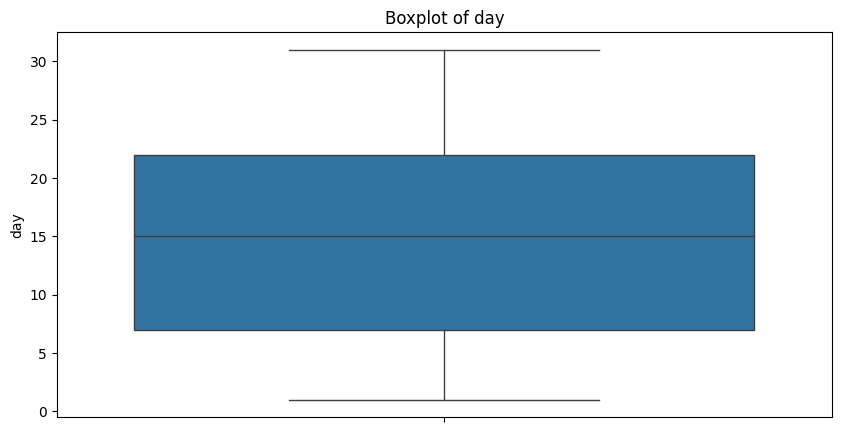

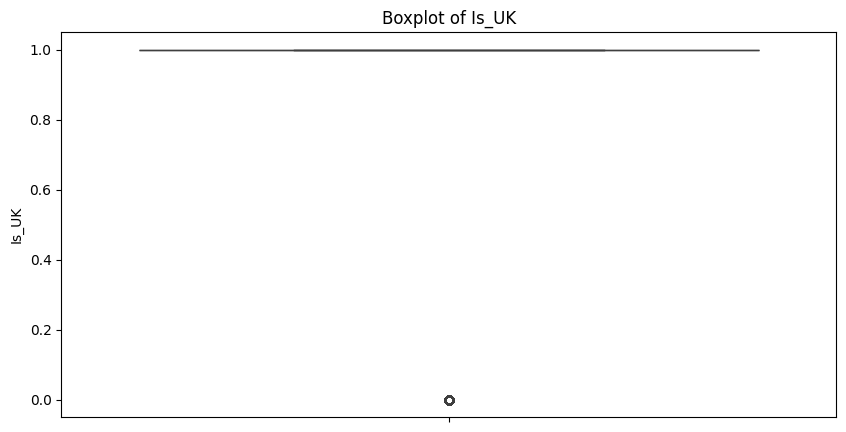

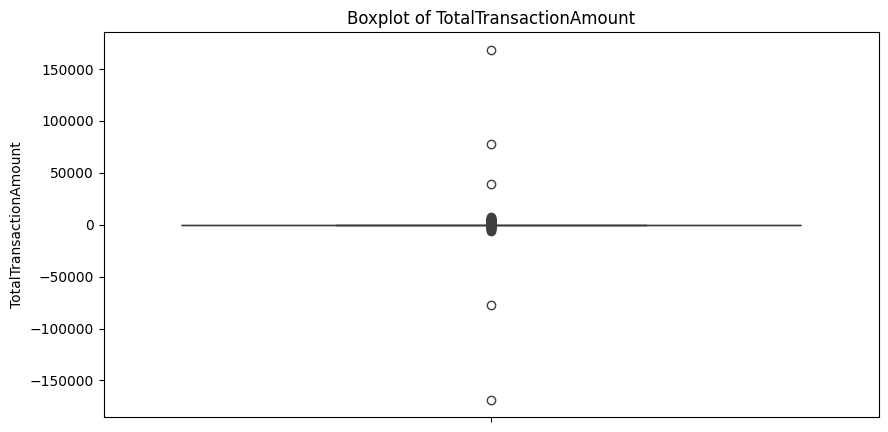

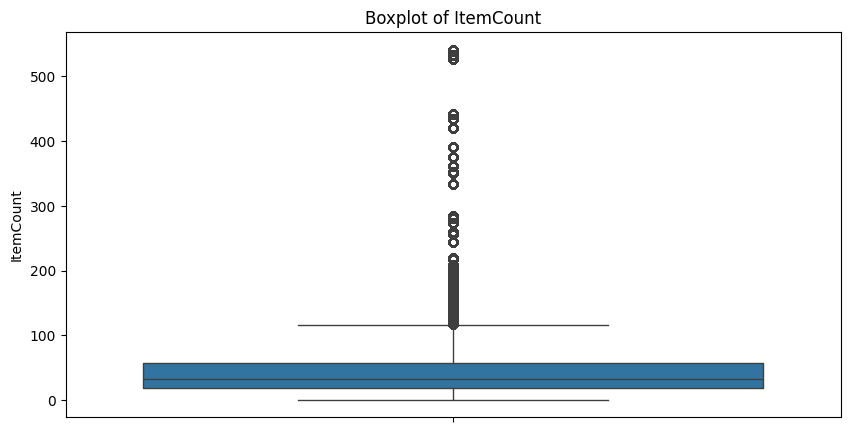

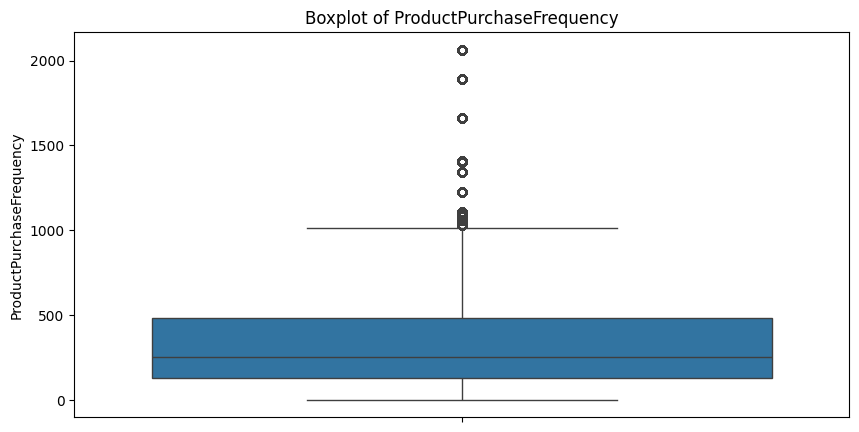

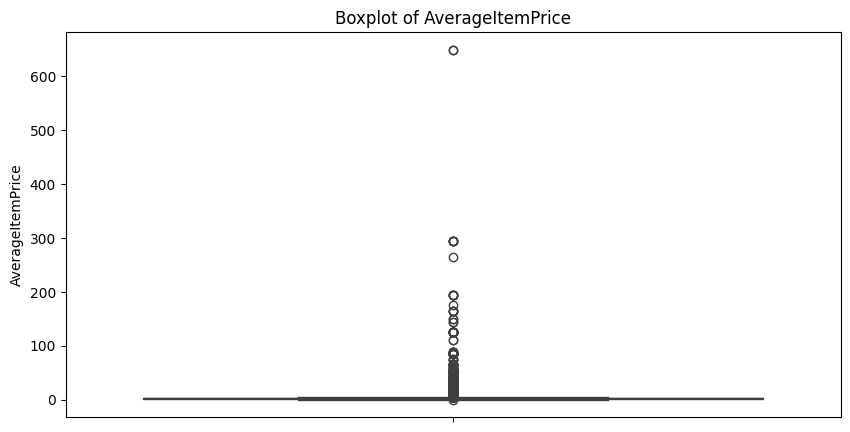

In [ ]:
plot_box(data_cleaned)

In [ ]:
# how many outliers are in the data
def find_outliers(data):
    for column in data.columns:
        if data[column].dtype != object:
            Q1 = data[column].quantile(0.25)
            Q3 = data[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = ((data[column] < lower_bound) | (data[column] > upper_bound)).sum()
            percentage = (outliers / data[column].shape[0]) * 100
            print(f"Column {column} has {round(percentage, 2)}% outliers")
            print("-" * 50)

In [ ]:
find_outliers(data_cleaned)

Column Quantity has 6.65% outliers
--------------------------------------------------
Column UnitPrice has 8.57% outliers
--------------------------------------------------
Column CustomerID has 0.0% outliers
--------------------------------------------------
Column Days_Since_Last_Purchase has 0.04% outliers
--------------------------------------------------
Column year has 6.56% outliers
--------------------------------------------------
Column month has 0.0% outliers
--------------------------------------------------
Column day has 0.0% outliers
--------------------------------------------------
Column Is_UK has 10.89% outliers
--------------------------------------------------
Column TotalTransactionAmount has 8.06% outliers
--------------------------------------------------
Column ItemCount has 6.43% outliers
--------------------------------------------------
Column ProductPurchaseFrequency has 4.64% outliers
--------------------------------------------------
Column AverageItemPri

In [ ]:
# Remove outliers from the data and replace by the median
def remove_outliers(data):
    for column in data.columns:
        if data[column].dtype != object:
            Q1 = data[column].quantile(0.25)
            Q3 = data[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            data[column] = np.where(data[column] > upper_bound, data[column].median(), data[column])
            data[column] = np.where(data[column] < lower_bound, data[column].median(), data[column])
    return data



In [ ]:
data_Final = remove_outliers(data_cleaned)

In [ ]:
find_outliers(data_Final)

Column Quantity has 0.0% outliers
--------------------------------------------------
Column UnitPrice has 3.91% outliers
--------------------------------------------------
Column CustomerID has 0.0% outliers
--------------------------------------------------
Column Days_Since_Last_Purchase has 0.07% outliers
--------------------------------------------------
Column year has 0.0% outliers
--------------------------------------------------
Column month has 0.0% outliers
--------------------------------------------------
Column day has 0.0% outliers
--------------------------------------------------
Column Is_UK has 0.0% outliers
--------------------------------------------------
Column TotalTransactionAmount has 2.79% outliers
--------------------------------------------------
Column ItemCount has 2.8% outliers
--------------------------------------------------
Column ProductPurchaseFrequency has 3.96% outliers
--------------------------------------------------
Column AverageItemPrice ha

## **Univariate Analysis on the Final cleaned data**

In [ ]:
# Function to plot a boxplot and a histogram along the same scale

def histogram_boxplot(data, feature, figsize = (12, 7), kde = False, bins = None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )                   # Creating the 2 subplots
    sns.boxplot(
        data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )                   # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )                   # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )                   # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )                   # Add median to the histogram

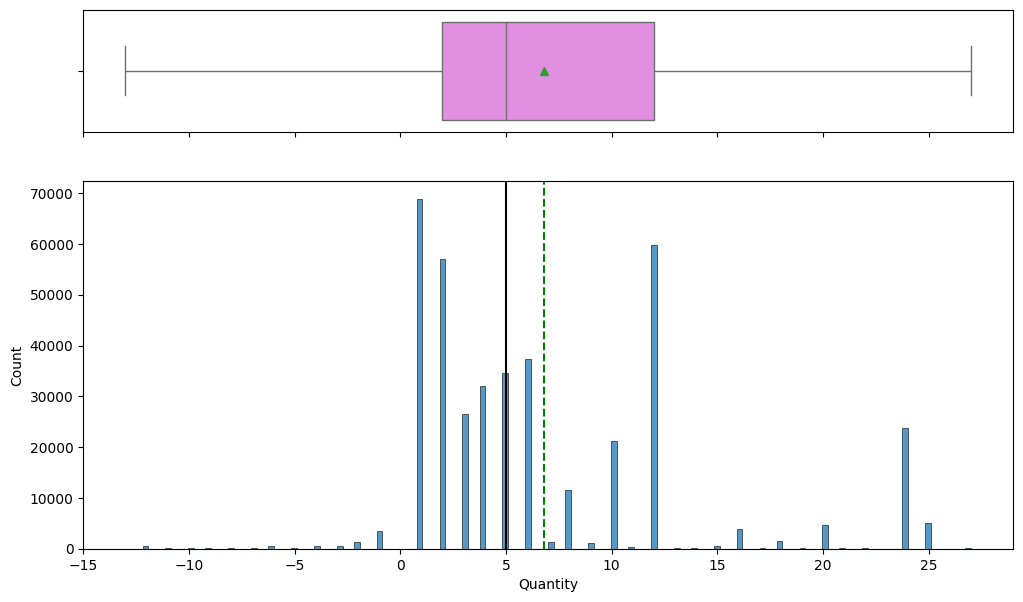

In [ ]:
histogram_boxplot(data_Final, "Quantity")

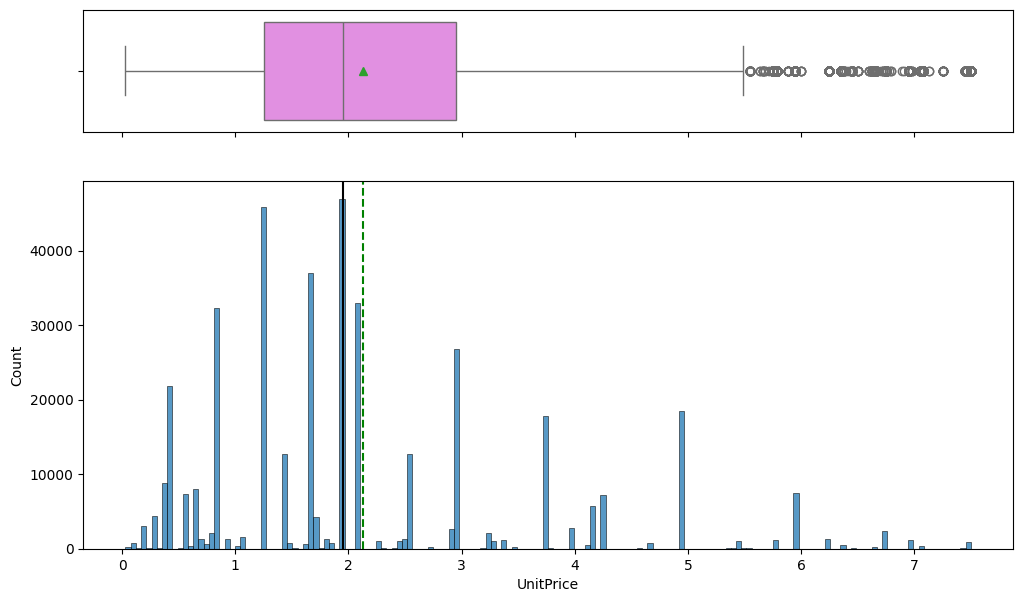

In [ ]:
histogram_boxplot(data_Final, "UnitPrice")

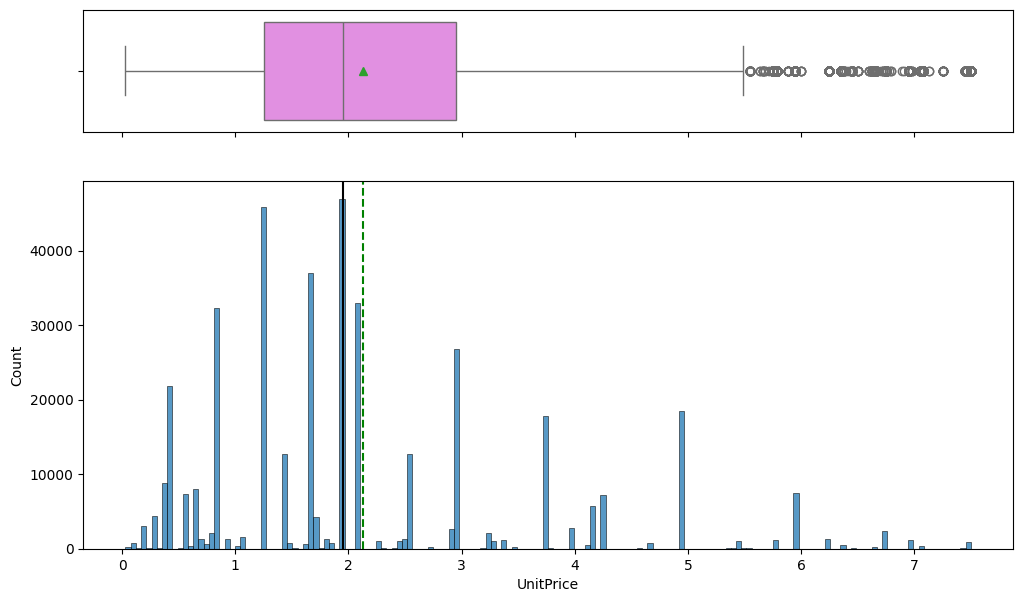

In [ ]:
histogram_boxplot(data_Final, "UnitPrice")

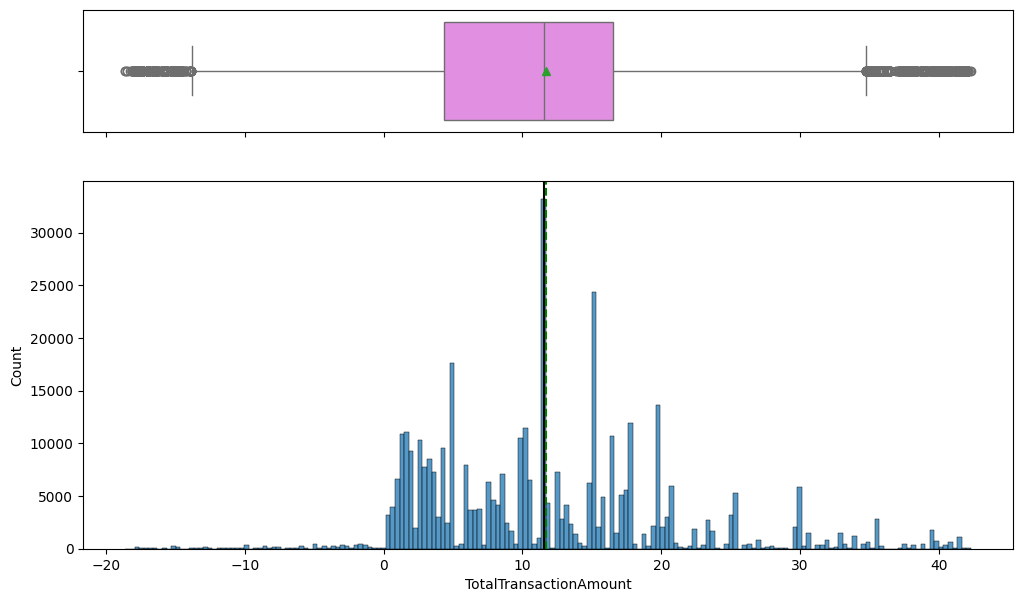

In [ ]:
histogram_boxplot(data_Final, "TotalTransactionAmount")

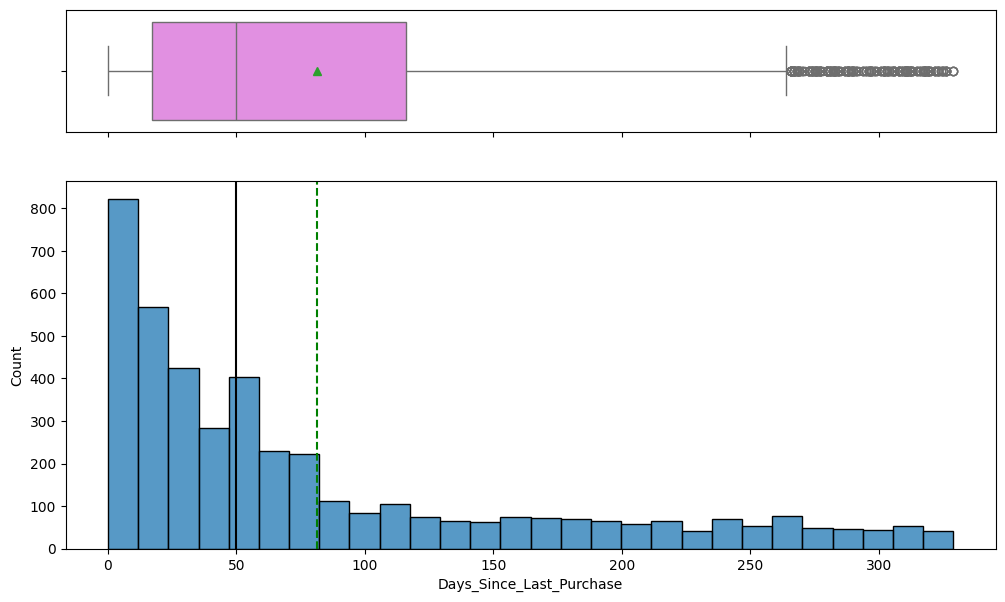

In [ ]:
histogram_boxplot(data_Final, "Days_Since_Last_Purchase")

In [ ]:
data_Final.head(2)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Transaction_Status,Days_Since_Last_Purchase,year,month,day,Is_UK,TotalTransactionAmount,ItemCount,ProductPurchaseFrequency,AverageItemPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2.55,17850.0,Completed,325.0,2011.0,12.0,1.0,1.0,15.30,7.0,255.0,3.91
1,536365,71053,WHITE METAL LANTERN,6.0,3.39,17850.0,Completed,2.0,2011.0,12.0,1.0,1.0,20.34,7.0,266.0,3.91


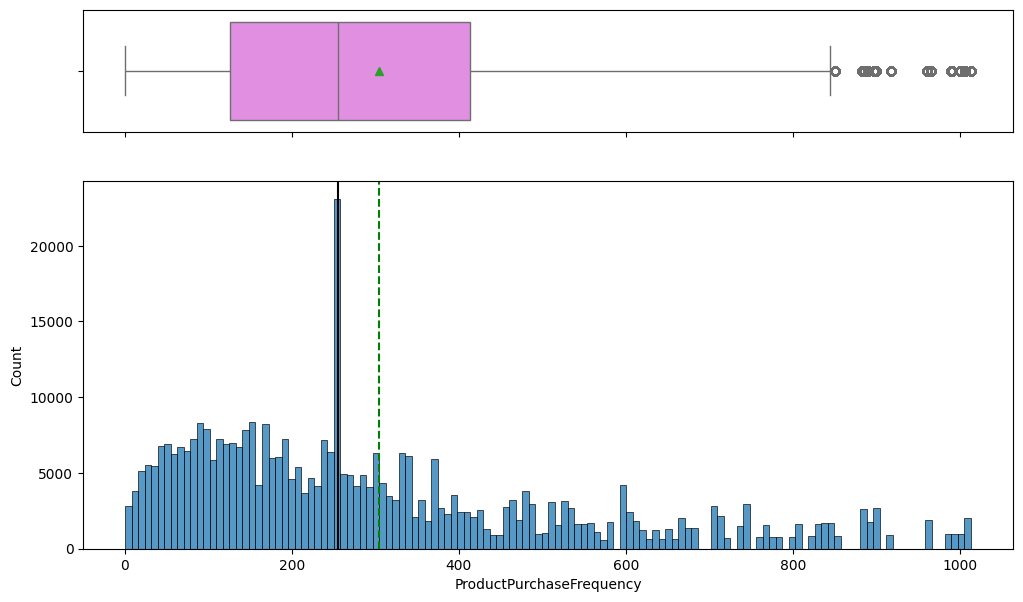

In [ ]:
histogram_boxplot(data_Final, "ProductPurchaseFrequency")

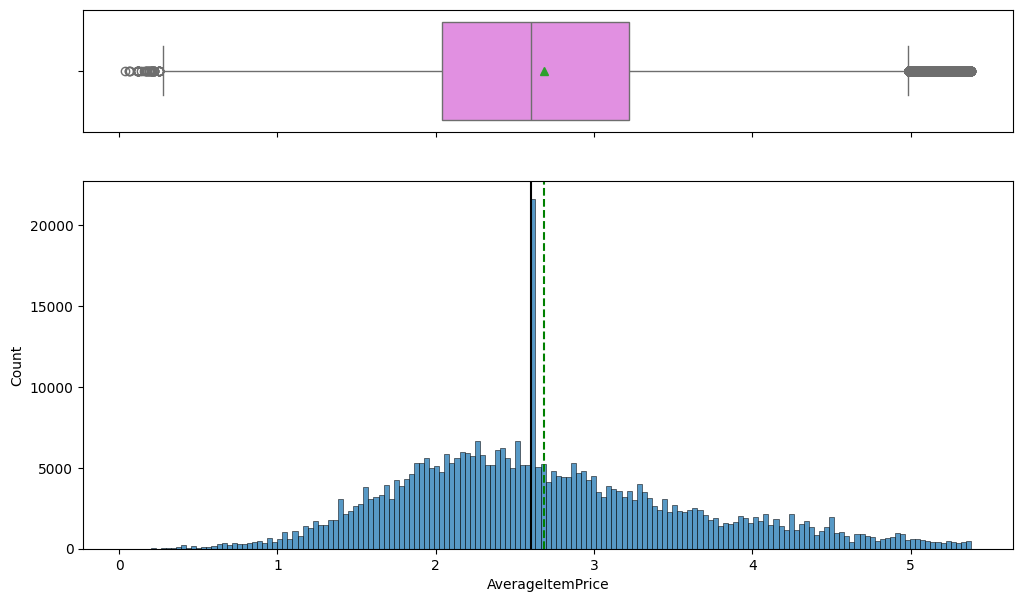

In [ ]:
histogram_boxplot(data_Final, "AverageItemPrice")

In [ ]:
data_Final.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Transaction_Status,Days_Since_Last_Purchase,year,month,day,Is_UK,TotalTransactionAmount,ItemCount,ProductPurchaseFrequency,AverageItemPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2.55,17850.0,Completed,325.0,2011.0,12.0,1.0,1.0,15.30,7.0,255.0,3.91
1,536365,71053,WHITE METAL LANTERN,6.0,3.39,17850.0,Completed,2.0,2011.0,12.0,1.0,1.0,20.34,7.0,266.0,3.91
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2.75,17850.0,Completed,75.0,2011.0,12.0,1.0,1.0,22.00,7.0,249.0,3.91
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,3.39,17850.0,Completed,18.0,2011.0,12.0,1.0,1.0,20.34,7.0,327.0,3.91
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,3.39,17850.0,Completed,310.0,2011.0,12.0,1.0,1.0,20.34,7.0,328.0,3.91


In [ ]:
data_Final.shape

(399360, 16)

In [ ]:
data_Final.to_csv('data_Final.csv', index=False)

### **Bivariate Analysis on the Final cleaned data**

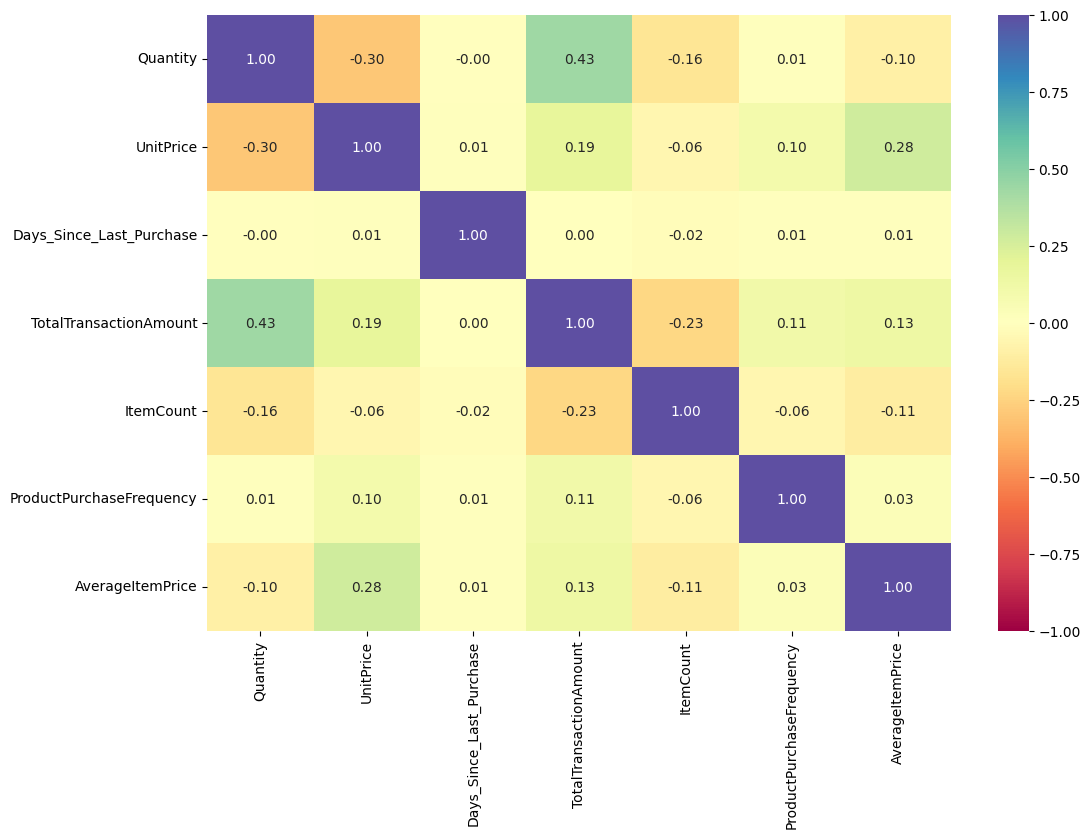

In [ ]:
cols_list = ["Quantity", "UnitPrice", "Days_Since_Last_Purchase", "TotalTransactionAmount", "ItemCount", "ProductPurchaseFrequency", "AverageItemPrice"]#data_Final.select_dtypes(include = np.number).columns.tolist()

plt.figure(figsize = (12, 8))
sns.heatmap(
    data_Final[cols_list].corr(), annot = True, vmin = -1, vmax = 1, fmt = ".2f", cmap = "Spectral"
)
plt.show()

**Let's check the distribution of our target variable i.e UnitPrice with the numeric columns**

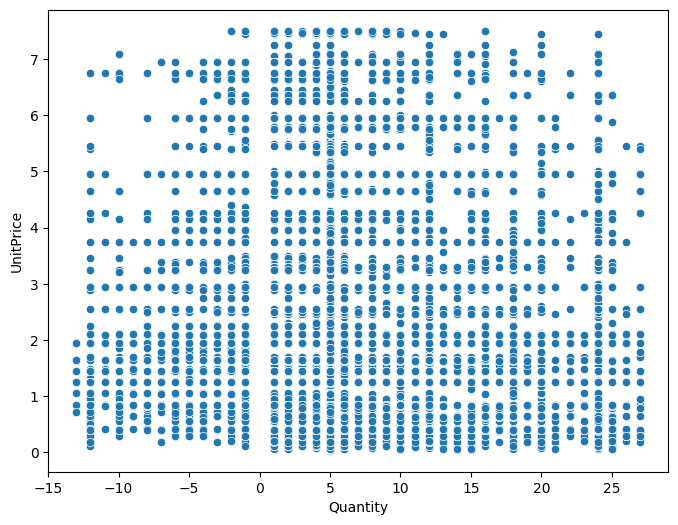

In [ ]:
plt.figure(figsize = [8, 6])
sns.scatterplot(x = data_Final.Quantity, y = data_Final.UnitPrice)
plt.show()

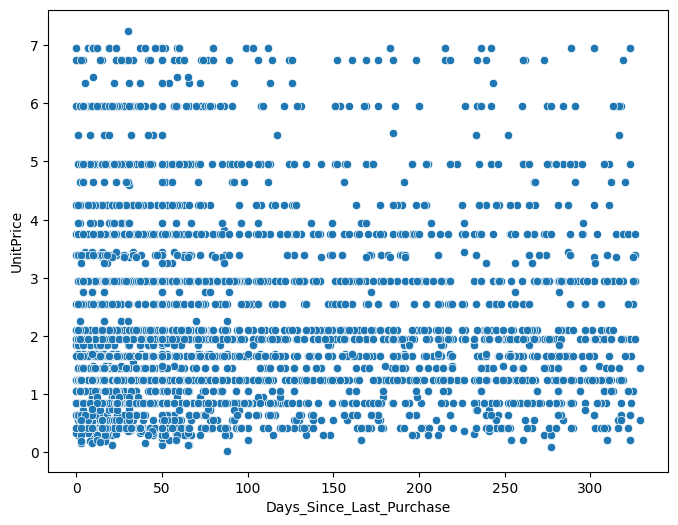

In [ ]:
plt.figure(figsize = [8, 6])
sns.scatterplot(x = data_Final.Days_Since_Last_Purchase, y = data_Final.UnitPrice)
plt.show()

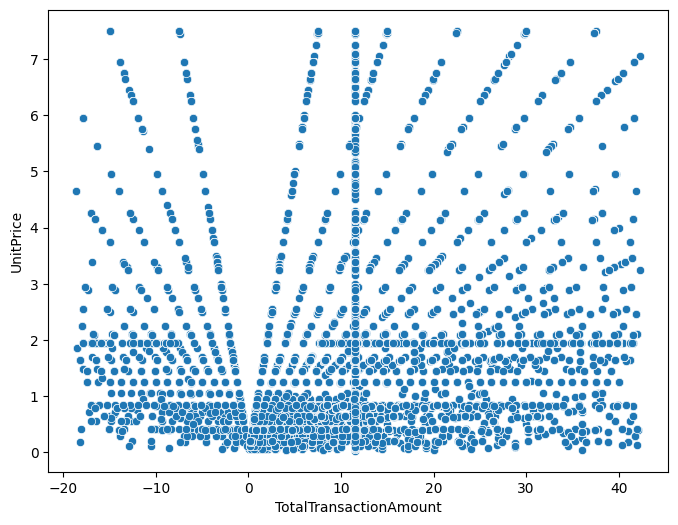

In [ ]:
plt.figure(figsize = [8, 6])
sns.scatterplot(x = data_Final.TotalTransactionAmount, y = data_Final.UnitPrice)
plt.show()

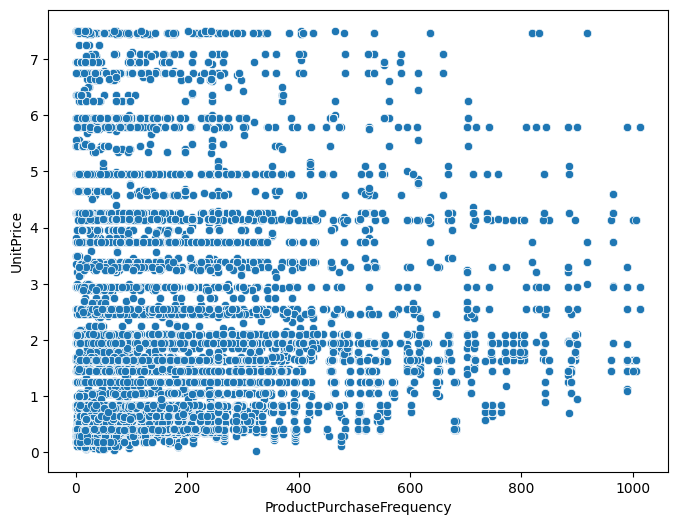

In [ ]:
plt.figure(figsize = [8, 6])
sns.scatterplot(x = data_Final.ProductPurchaseFrequency, y = data_Final.UnitPrice)
plt.show()

## **Observations**

It's evident that there's no discernible relationship between the UnitPrice and other numerical variables in the dataset.

## **Bulding a Recommendation System for recommending product bundles**

**Task 1:**

Implement a solution of your choice for recommending product bundles e.g.
rule-based, statistics, or ML-based solution. Please describe any reasoning behind your solution.

For the purpose of this example, I will use an Association Rule Mining approach for recommending product bundles. This approach is chosen for its simplicity and effectiveness in identifying items that are frequently bought together. I will use the Apriori algorithm to generate frequent itemsets and then derive association rules which can suggest product bundles.

## **Bundle price computation per bundle**

## **Task 4:**
Discuss/implement any price computation per bundle e.g. the sum of products’
prices

To apply the concept of bundle price computation using the data provided, we'll first need to define what constitutes a "bundle" in this dataset. Since the dataset includes fields like InvoiceNo, StockCode, Description, Quantity, and UnitPrice, we can consider each invoice as a transaction that potentially contains multiple products (a bundle).

We'll compute the total price for each invoice (bundle) by summing up the product of Quantity and UnitPrice for all items within the same invoice. This approach will give us the total sales amount per transaction, which represents the bundle price.

In [ ]:
# Grouping the data by InvoiceNo to treat each invoice as a bundle
# and calculating the total price for each bundle
bundle_prices = data_Final.groupby('InvoiceNo').apply(lambda x: (x['Quantity'] * x['UnitPrice']).sum()).reset_index(name='TotalBundlePrice')

# Display the first few rows of the computed bundle prices
bundle_prices.head(10)

,InvoiceNo,TotalBundlePrice
0,536365,127.72
1,536366,22.20
2,536367,169.10
3,536368,70.05
4,536369,17.85
5,536370,745.16
6,536371,12.75
7,536372,22.20
8,536373,248.46
9,536374,9.75


## **Observations:**
This table shows the InvoiceNo along with the computed TotalBundlePrice, representing the sum of products' prices within each invoice. This approach allows us to understand the transaction value and could be further utilized for insights into sales trends, customer purchasing behavior, and bundle pricing strategies


## **Data preparation for regression model for the products’ prices (UnitPrice) prediction.**

- We want to predict the UnitPrice.
- Before we proceed to build a model, we'll have to encode categorical features and drop the unnecessary columns.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

**Performing Encoding on the non-numerical columns, which may be necessary for the price recommendation.**

In [ ]:
label_en = LabelEncoder()
data_Final['StockCode_Encode'] = label_en.fit_transform(data_Final['StockCode'])
data_Final['Invoice_Encode'] = label_en.fit_transform(data_Final['InvoiceNo'])
data_Final['Transaction_Status_Encode'] = label_en.fit_transform(data_Final['Transaction_Status'])

In [ ]:
data_Final.head(3)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Transaction_Status,Days_Since_Last_Purchase,year,month,day,Is_UK,TotalTransactionAmount,ItemCount,ProductPurchaseFrequency,AverageItemPrice,StockCode_Encode,Invoice_Encode,Transaction_Status_Encode
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2.55,17850.0,Completed,325.0,2011.0,12.0,1.0,1.0,15.30,7.0,255.0,3.91,3248,0,1
1,536365,71053,WHITE METAL LANTERN,6.0,3.39,17850.0,Completed,2.0,2011.0,12.0,1.0,1.0,20.34,7.0,266.0,3.91,2648,0,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2.75,17850.0,Completed,75.0,2011.0,12.0,1.0,1.0,22.00,7.0,249.0,3.91,2854,0,1


In [ ]:
data_Final2 = data_Final.drop(["Description", "Is_UK", "InvoiceNo", "Days_Since_Last_Purchase", "StockCode", "CustomerID", "Transaction_Status", "year", "month", "day"], axis = 1)

In [ ]:
data_Final2.head(3)

,Quantity,UnitPrice,TotalTransactionAmount,ItemCount,ProductPurchaseFrequency,AverageItemPrice,StockCode_Encode,Invoice_Encode,Transaction_Status_Encode
0,6.0,2.55,15.30,7.0,255.0,3.91,3248,0,1
1,6.0,3.39,20.34,7.0,266.0,3.91,2648,0,1
2,8.0,2.75,22.00,7.0,249.0,3.91,2854,0,1


In [ ]:
# Separating features and the target column
X = data_Final2.drop(["UnitPrice"], axis = 1)
y = data_Final2["UnitPrice"]

In [ ]:
X = sm.add_constant(X)

## **Data Splitting for the modelling**

**Question 2:** Provide a splitting to train and test datasets. Discuss possible different splitting
criteria. What other splitting criteria would you choose if you could gather more features/data?

**Random Splitting:**

- The most straightforward method is to randomly divide the dataset into training and test sets, typically with ratios like 70:30, 80:20, or 60:40.
- Random splitting ensures that both subsets are likely to be representative of the overall dataset.

**Stratified Splitting:**

- In datasets where the target variable or a significant categorical feature has imbalanced classes, stratified splitting ensures that each class is proportionately represented in both training and test sets.
- This approach is crucial for classification problems to prevent biased model training due to imbalanced data.

**Time-based Splitting:**

- For time-series data or datasets where temporal dynamics play a crucial role (e.g., sales data over time), splitting based on time ensures that the model is trained on past data and tested on future data.
- This approach can help evaluate the model's performance in forecasting future events based on historical data.

**Splitting with Additional Features/Data**
With more features or data, splitting criteria could be further refined or adapted to the specific nature of the data:

**Cluster-based Splitting:**

- If additional data allows for meaningful clustering of observations (e.g., customer segments, product categories), we can split the data based on these clusters to ensure that the model learns to generalize across different groups.

**Domain-specific Temporal Splitting:**

For datasets with seasonal patterns or specific cycles (e.g., retail, finance), splitting based on these cycles ensures the model is trained and tested across different seasonal dynamics.

In [ ]:
# Splitting the data into train and test sets in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.20, random_state = 42)

### **Check for Multicollinearity**

We will use the Variance Inflation Factor (VIF), to check if there is multicollinearity in the data.

Features having a VIF score > 5 will be dropped/treated till all the features have a VIF score < 5

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif

print(checking_vif(X_train))

                     feature        VIF
0                      const  76.808355
1                   Quantity   1.298756
2     TotalTransactionAmount   1.393954
3                  ItemCount   1.148202
4   ProductPurchaseFrequency   1.021160
5           AverageItemPrice   1.065944
6           StockCode_Encode   1.020379
7             Invoice_Encode   1.105902
8  Transaction_Status_Encode   1.238291


## **Observations:**

All the features exhibit a Variance Inflation Factor (VIF) less than 5, indicating an absence of multicollinearity among the chosen features.

## **Building a Regression Model to predict the Unit price of the products**

**Task 6:**

Implement a regression model for the products’ prices (UnitPrice) prediction. Is the provided data sufficient to predict the price? What other data would you like to gather to improve your solution?

**Answer:**

I have developed four regression models utilizing Linear Regression, Ridge Regression, Random Forest Regression, and Decision Tree Regression. The Linear and Ridge Regression models exhibited poor performance on both the training and test datasets. Conversely, the Random Forest and Decision Tree Regression models demonstrated superior accuracy in predicting the unit price.

**Other data requirement:**

While the provided data contains some elements necessary for building a basic pricing model (e.g., identifying products and potentially capturing some temporal and geographic pricing patterns), it lacks several key factors that could significantly enhance price prediction accuracy. Detailed product attributes, cost information, competitor pricing, customer segmentation data, and promotional activities are examples of data that would enrich the model.

**Cost Information:** Knowing the cost of acquiring or producing each product would provide insight into how prices are set relative to costs, allowing for more accurate predictions of retail prices.

**Market Trends and Economic Factors:** Data on broader market trends, such as demand fluctuations, economic indicators (inflation rates, consumer spending patterns), and industry-specific trends, could improve the model's accuracy by accounting for external factors influencing prices.

**Supply Chain Dynamics:** Information on supply chain variables, including availability of raw materials, manufacturing costs, and logistics expenses, can affect product pricing. Changes in these areas can lead to adjustments in retail prices.

**Promotions and Discounts:** Historical data on promotional campaigns, discount strategies, and their impact on sales and pricing would enable the model to account for temporary price variations.



In [ ]:
# Function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# Function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    pred = model.predict(predictors)                  # Predict using the independent variables
    r2 = r2_score(target, pred)                       # To compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)    # To compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # To compute RMSE
    mae = mean_absolute_error(target, pred)           # To compute MAE
    mape = mape_score(target, pred)                   # To compute MAPE

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

## **Building Models**

Let's create a function to calculate the performance metrics for our regression model so that we don't need to use the same code repeatedly.

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error, mean_squared_error

# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test):

    # In-sample Prediction
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    np.sqrt(mean_squared_error(y_pred_train, y_observed_train)),
                    np.sqrt(mean_squared_error(y_pred_test, y_observed_test)),
                ],
                "MAE": [
                    mean_absolute_error(y_pred_train, y_observed_train),
                    mean_absolute_error(y_pred_test, y_observed_test),
                ],

                "r2": [
                    r2_score(y_pred_train, y_observed_train),
                    r2_score(y_pred_test, y_observed_test),
                ],
            }
        )
    )

In [ ]:
# Create the model
model1 = sm.OLS(y_train, X_train).fit()

# Get the model summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              UnitPrice   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                 1.358e+04
Date:                Fri, 23 Feb 2024   Prob (F-statistic):               0.00
Time:                        14:51:02   Log-Likelihood:            -5.2989e+05
No. Observations:              319488   AIC:                         1.060e+06
Df Residuals:                  319479   BIC:                         1.060e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         1.3936      0.020     70.728      0.000       1.355       1.432
Quantity                     -0.0961      0.000   -246.631      0.000      -0.097      -0.095
TotalTransactionAmount        0.0548      0.000    185.405      0.000       0.054       0.055
ItemCount                    -0.0016   9.87e-05    -15.941      0.000      -0.002      -0.001
ProductPurchaseFrequency      0.0004   9.63e-06     39.545      0.000       0.000       0.000
AverageItemPrice              0.2936      0.003    116.307      0.000       0.289       0.299
StockCode_Encode           6.816e-05   2.73e-06     24.990      0.000    6.28e-05    7.35e-05
Invoice_Encode             6.122e-07    4.3e-07      1.422      0.155   -2.31e-07    1.46e-06
Transaction_Status_Encode    -0.2206      0.017    -12.700      0.000      -0.255      -0.187
==============================================================================
Omnibus:                    67891.555   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           141296.143
Skew:                           1.257   Prob(JB):                         0.00
Kurtosis:                       5.072   Cond. No.                     1.27e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Checking model1 performance
model_pref(model1, X_train, X_test)

    Data      RMSE       MAE        r2
0  Train  1.270761  0.929711 -1.939782
1   Test  1.262381  0.926566 -1.918553


In [ ]:
lin_reg_test = model_performance_regression(model1, X_train, y_train)
lin_reg_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.270761,0.929711,0.253821,0.2538,71.822756


In [ ]:
lin_reg_test = model_performance_regression(model1, X_test, y_test)
lin_reg_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.262381,0.926566,0.256592,0.256509,72.044259


**Observations:**
- The Train and the Test scores are very close to each other so we can say the model is not overfitting.
- However, the Test score is very small so that we might not be able to get better performance.

###  **Dropping insignificant variables (variables with p-value > 0.05) from the above model and create the regression model again.**

In [ ]:
X_train1 = X_train.drop(["Invoice_Encode"], axis = 1)

In [ ]:
X_test1 = X_test.drop(["Invoice_Encode"], axis = 1)

In [ ]:
# Create the model
model2 = sm.OLS(y_train, X_train1).fit()

# Get the model summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              UnitPrice   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                 1.552e+04
Date:                Fri, 23 Feb 2024   Prob (F-statistic):               0.00
Time:                        14:51:23   Log-Likelihood:            -5.2989e+05
No. Observations:              319488   AIC:                         1.060e+06
Df Residuals:                  319480   BIC:                         1.060e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         1.4059      0.018     79.351      0.000       1.371       1.441
Quantity                     -0.0961      0.000   -246.627      0.000      -0.097      -0.095
TotalTransactionAmount        0.0548      0.000    185.415      0.000       0.054       0.055
ItemCount                    -0.0016   9.85e-05    -15.880      0.000      -0.002      -0.001
ProductPurchaseFrequency      0.0004   9.63e-06     39.579      0.000       0.000       0.000
AverageItemPrice              0.2934      0.003    116.498      0.000       0.288       0.298
StockCode_Encode           6.852e-05   2.72e-06     25.234      0.000    6.32e-05    7.38e-05
Transaction_Status_Encode    -0.2272      0.017    -13.576      0.000      -0.260      -0.194
==============================================================================
Omnibus:                    67901.982   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           141327.088
Skew:                           1.257   Prob(JB):                         0.00
Kurtosis:                       5.072   Cond. No.                     1.85e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Checking model2 performance
model_pref(model2, X_train1, X_test1)

    Data      RMSE       MAE        r2
0  Train  1.270765  0.929689 -1.939855
1   Test  1.262392  0.926553 -1.918743


## **Observation:**

There is no significant change in the perfonace metric after removing the InvoiceNo with the VIF > 5.

### **Checking the below linear regression assumptions**

1. **Mean of residuals should be 0**
2. **No Heteroscedasticity**
3. **Linearity of variables**
4. **Normality of error terms**

### **1. Check for mean residuals**

In [ ]:
residuals = model2.resid

np.mean(residuals)

-3.783423005087591e-14

**Observation:**

- The mean of residuals is very close to 0. Hence, the corresponding assumption is satisfied.

### **2. Check for homoscedasticity**

- Homoscedasticity - If the residuals are symmetrically distributed across the regression line, then the data is said to be homoscedastic.

- Heteroscedasticity- - If the residuals are not symmetrically distributed across the regression line, then the data is said to be heteroscedastic. In this case, the residuals can form a funnel shape or any other non-symmetrical shape.

- We'll use `Goldfeldquandt Test` to test the following hypothesis with alpha = 0.05:

    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedastic

In [ ]:
from statsmodels.stats.diagnostic import het_white

from statsmodels.compat import lzip

import statsmodels.stats.api as sms

In [ ]:
import statsmodels.stats.api as sms

from statsmodels.compat import lzip

name = ["F statistic", "p-value"]

test = sms.het_goldfeldquandt(y_train, X_train1)

lzip(name, test)

[('F statistic', 0.9833665856173391), ('p-value', 0.9995986571065173)]

**Observation:**

- Since p-value > 0.05, we cannot reject the Null Hypothesis that the residuals are homoscedastic and the corresponding assumption is satisfied.

### **3. Linearity of variables**

It states that the predictor variables must have a linear relation with the dependent variable.

To test the assumption, we'll plot residuals and the fitted values on a plot and ensure that residuals do not form a strong pattern. They should be randomly and uniformly scattered on the x-axis.

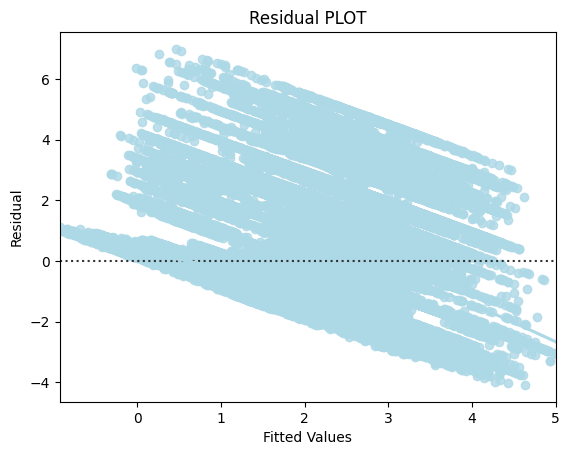

In [ ]:
# Predicted values
fitted = model2.fittedvalues

# sns.set_style("whitegrid")
sns.residplot(x = fitted, y = residuals, color = "lightblue", lowess = True)

plt.xlabel("Fitted Values")

plt.ylabel("Residual")

plt.title("Residual PLOT")

plt.show()

**Observation:**

- There is no pattern in the residual vs fitted values plot. Hence, the corresponding assumption is satisfied.

### **4. Normality of error terms**

The residuals should be normally distributed.

<Axes: ylabel='Count'>

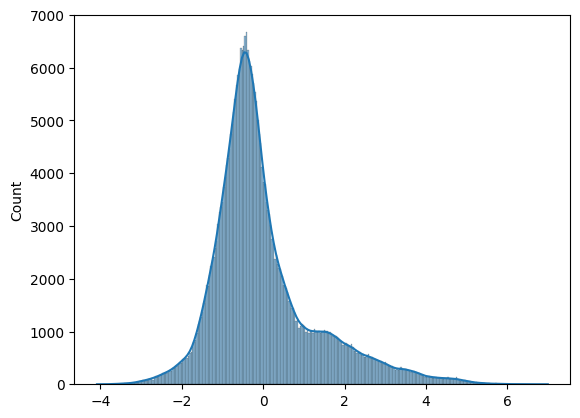

In [ ]:
# Plot histogram of residuals
sns.histplot(residuals, kde = True)

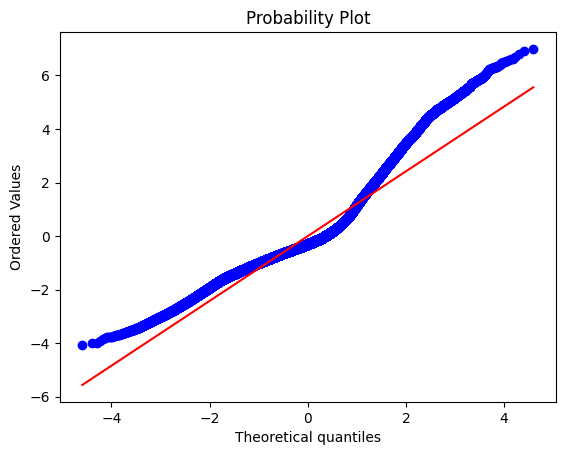

In [ ]:
# Plot q-q plot of residuals
import pylab

import scipy.stats as stats

stats.probplot(residuals, dist = "norm", plot = pylab)

plt.show()

**Observation:**

- From the above plots, the residuals seem to follow a normal distribution. Hence, the corresponding assumption is satisfied. Now, we will check the model performance on the train and test datasets.

In [ ]:
coef = model2.params
coef

const                        1.405862
Quantity                    -0.096093
TotalTransactionAmount       0.054756
ItemCount                   -0.001564
ProductPurchaseFrequency     0.000381
AverageItemPrice             0.293365
StockCode_Encode             0.000069
Transaction_Status_Encode   -0.227170
dtype: float64

## **Observation:**

The regression coefficients reveal that AverageItemPrice is the predominant factor affecting the prediction of unit price, while the other features contribute minimally to forecasting unit price. Consequently, acquiring additional features is necessary to develop an effective linear model for prediction.

**Quantity (-0.096093):** Negatively influences the Unit Price. A higher quantity is associated with a lower Unit Price, making it relevant, especially considering its negative relationship.

**TotalTransactionAmount (0.054756):** Positively influences the Unit Price. This suggests that as the total transaction amount increases, so does the Unit Price, indicating its relevance.

**ItemCount (-0.001564):** Has a very slight negative impact on Unit Price. Its small coefficient suggests it has minimal influence, making it less relevant compared to others.

**ProductPurchaseFrequency (0.000381):** Positively influences the Unit Price, but given its very small coefficient, its impact is likely negligible, making it less relevant.

**AverageItemPrice (0.293365):** Positively influences the Unit Price significantly. This is the most substantial positive coefficient, indicating that AverageItemPrice is highly relevant in predicting Unit Price.

**StockCode_Encode (0.000069):** Has a very minimal positive impact on Unit Price. Its impact is likely too small to be considered relevant.

**Transaction_Status_Encode (-0.227170):** Negatively influences the Unit Price. This suggests that changes in transaction status (e.g., from regular to canceled) can significantly impact the Unit Price, making it relevant.

### **Apply cross validation to improve the model and evaluate it using different evaluation metrics**

Let's check the performance of the model using the cross-validation technique from the scikit-learn library and see if the performance on the train and the test data is comparable to what we are getting after cross-validating the data.

In [ ]:
# Import the required function

from sklearn.model_selection import cross_val_score

# Build the regression model and cross-validate
linearregression = LinearRegression()

cv_Score11 = cross_val_score(linearregression, X_train, y_train, cv = 10)
cv_Score12 = cross_val_score(linearregression, X_train, y_train, cv = 10,
                             scoring = 'neg_mean_squared_error')


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.254 (+/- 0.008)
Mean Squared Error: 1.615 (+/- 0.048)


**Observation:**
- After applying cross-validation the model score has improved. We can compare it by the evaluation metric scores.

## **Other models**

In [ ]:
# Standardization to reduce the differ of various input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **Ridge**

In [ ]:
# Create a Ridge regression model
rdg = Ridge()

In [ ]:
# Fit Ridge regression model.
rdg.fit(X_train, y_train)

Ridge()

In [ ]:
rdg.score(X_train, y_train)

0.25382114627403696

In [ ]:
rdg.score(X_test, y_test)

0.2565924583883773

## **Random Forest**

In [ ]:
# Create a Random Forest regression model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
# Fit Random Forest regression model.
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
rf.score(X_train, y_train)

0.9973458126831838

In [ ]:
# checking model performance on test dataset
rf.score(X_test, y_test)

0.981822670821247

## **Observation:**

The training set achieves a performance of 99.7%, while the testing set scores 98.1%, suggesting the model is overfitting slightly and necessitates optimization. Below, we propose using GridSearch optimization. Including the relevance of GridSearch, this technique plays a crucial role in fine-tuning machine learning models, such as random forests, by systematically searching through a specified parameter grid to identify the most effective parameters for reducing overfitting and enhancing model performance.

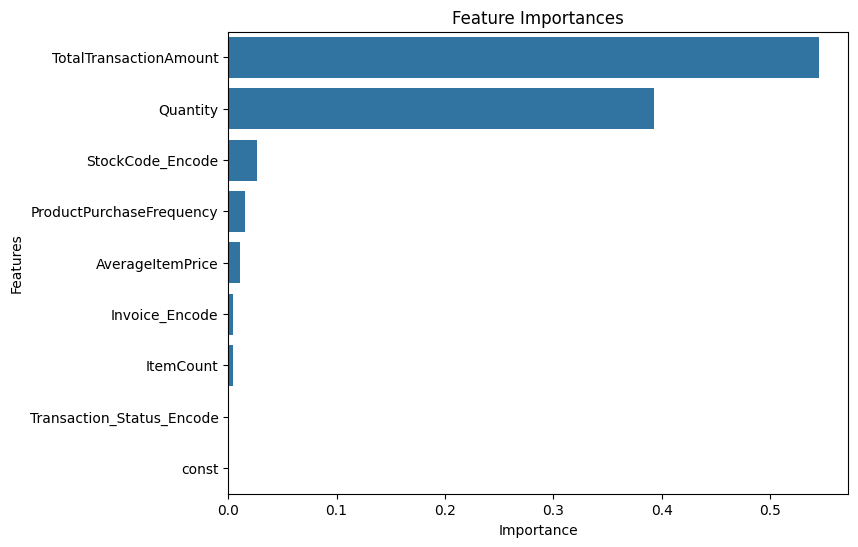

In [ ]:
importances = rf.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 6))  # Adjust the size as needed
sns.barplot(x=importance_df['Importance'], y=importance_df.index)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

## **Observation:**


The feature importance analysis indicates that quantity and total transaction amount are the most significant factors in predicting the Unit Price when employing the random forest algorithm.

## **Decision Tree**

In [ ]:
# Create a decision tree regression model
dtree = DecisionTreeRegressor(random_state = 1)

In [ ]:
# Fit decision tree regression model.
dtree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [ ]:
dtree.score(X_train, y_train)

0.9999991766171032

In [ ]:
dtree.score(X_test, y_test)

0.9585939336004334

## **Observation:**

There is a slight isue of overfitting in the training set

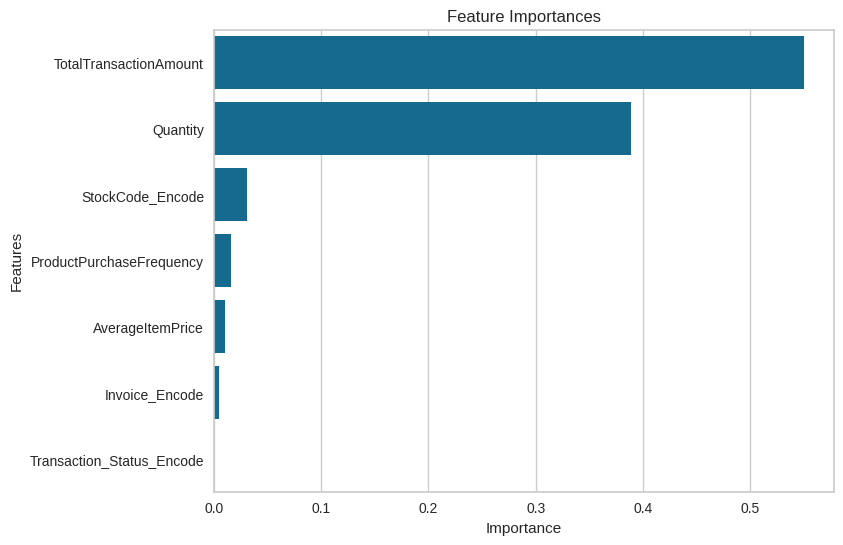

In [ ]:
importances = dtree.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 6))  # Adjust the size as needed
sns.barplot(x=importance_df['Importance'], y=importance_df.index)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

## **Observation:**

The feature importance analysis indicates that quantity and total transaction amount are the most significant factors in predicting the Unit Price when employing the random forest algorithm.

### **Hyperparameter Tuning - Random Forest**. (Note: This takes a lot of time to converge)

In [ ]:
# Choose the type of regressor
rf_tuned = RandomForestRegressor(random_state = 1)

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 6],
    "max_features": ["sqrt", "log2"],
    "n_estimators": [300, 500, 900, 1000],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring = scorer, cv = 3)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

## **Bulding a Recommendation System for recommending product bundles**

**Task 1:**

Implement a solution of your choice for recommending product bundles e.g.
rule-based, statistics, or ML-based solution. Please describe any reasoning behind your solution.

For the purpose of this example, I will use the rule based approach for recommending product bundles. The reasons are as follows:
- The approach is straightforward to implement and understand.
- It doesn't require complex algorithms or machine learning models, making it accessible to a wide range of users.
- Recommendations made by this method are easy to interpret.
- Users can readily understand why items are recommended together since the basis is their frequent co-occurrence in past transactions.

This code outputs the top 10 product bundles based on their frequency of co-occurrence in transactions, using the dataset loaded into the data DataFrame. It provides a clear rule-based approach to identify items that are often purchased together, which can then be used to recommend product bundles to customers.

In [ ]:
!pip install Flask

In [ ]:
from itertools import combinations
from collections import Counter

# Group transactions and list items for each transaction
transactions = data_Final.groupby('InvoiceNo')['StockCode'].apply(list)

# Generate item pairs within transactions and count occurrences
item_pairs = [tuple(sorted(pair)) for transaction in transactions for pair in combinations(transaction, 2)]
pair_counts = Counter(item_pairs)

# Define a threshold for what we consider a frequent item pair
threshold = 5

# Filter pairs meeting the frequency threshold
frequent_itemsets = {pair: count for pair, count in pair_counts.items() if count >= threshold}

# Map stock codes to product descriptions
stock_to_description = pd.Series(data_Final.Description.values, index=data_Final.StockCode).to_dict()

# Convert stock codes in frequent itemsets to descriptions
frequent_itemsets_descriptions = {
    tuple(stock_to_description.get(code, code) for code in pair): count
    for pair, count in frequent_itemsets.items()
}

# Sort itemsets by frequency and output the top ones
frequent_itemsets_descriptions_sorted = sorted(frequent_itemsets_descriptions.items(), key=lambda x: x[1], reverse=True)

# Display the top 10 frequent itemsets with descriptions
print("Top 10 Product Bundles Recommended:")
for itemset, frequency in frequent_itemsets_descriptions_sorted[:10]:
    print(f"{itemset}: appeared together in {frequency} transactions")


Top 10 Product Bundles Recommended:
('JUMBO BAG PINK POLKADOT', 'JUMBO BAG RED RETROSPOT'): appeared together in 583 transactions
('GREEN REGENCY TEACUP AND SAUCER', 'ROSES REGENCY TEACUP AND SAUCER '): appeared together in 573 transactions
('ALARM CLOCK BAKELIKE GREEN', 'ALARM CLOCK BAKELIKE RED '): appeared together in 560 transactions
('LUNCH BAG RED RETROSPOT', 'LUNCH BAG PINK POLKADOT'): appeared together in 553 transactions
('LUNCH BAG RED RETROSPOT', 'LUNCH BAG  BLACK SKULL.'): appeared together in 553 transactions
('LUNCH BAG RED RETROSPOT', 'LUNCH BAG SUKI DESIGN '): appeared together in 546 transactions
('LUNCH BAG  BLACK SKULL.', 'LUNCH BAG SUKI DESIGN '): appeared together in 498 transactions
('LUNCH BAG  BLACK SKULL.', 'LUNCH BAG PINK POLKADOT'): appeared together in 491 transactions
('JUMBO BAG VINTAGE DOILY ', 'JUMBO BAG RED RETROSPOT'): appeared together in 484 transactions
('GREEN REGENCY TEACUP AND SAUCER', 'PINK REGENCY TEACUP AND SAUCER'): appeared together in 483 t

## **Task 3**
Discuss the size of the output list and how it can be decided per product.

**Answer**


Determining the optimal size of the output list for product bundle recommendations is a strategic endeavor that balances providing variety with avoiding overwhelm. This balance is crucial for leveraging transaction data effectively to enhance cross-selling opportunities without burdening customers with excessive choices. By setting a threshold for item pair frequency, the method filters for relevance, yet the one-size-fits-all approach may not suit every product's unique context. A dynamic adjustment strategy, considering product popularity, customer engagement metrics, and leveraging machine learning for personalized recommendations, can refine the process. Analyzing how customers interact with recommendations allows for ongoing optimization, ensuring the output list remains relevant and engaging. This adaptive approach caters to diverse customer preferences and behaviors, optimizing the number of bundle recommendations to enhance the shopping experience, encourage discovery, and ultimately drive sales, striking a perfect balance between too many and too few suggestions, and fostering a nuanced, customer-centric shopping journey.

## **Task 5**

How would you evaluate the business impact of the solution and share the outcome
with the internal stakeholders?

**Proposed approach**

- Evaluating the business impact of a product bundle recommendation system requires a multi-faceted approach that focuses on key performance indicators (KPIs) such as conversion rates, average order value (AOV), cross-selling efficiency, customer retention rates, and customer satisfaction. By implementing tracking mechanisms and using methods such as A/B testing or before-and-after comparisons, we can quantitatively measure the system's impact on sales and customer behavior.

- Additionally, collecting qualitative feedback through surveys and interviews provides insight into customers' experiences and satisfaction levels. Calculating the return on investment (ROI) by comparing the revenue generated or costs saved with the investment in the system provides a clear picture of financial profitability.

- Creating a comprehensive report or presentation that summarizes insights, methodologies, and detailed results, complemented by data visualizations and actionable recommendations, facilitates effective communication with internal stakeholders. The report should include an executive summary highlighting key impacts, detailed results with visualizations, and recommendations for improvements or optimizations. Presenting these insights in a stakeholder meeting ensures that the results are shared throughout the organization, promoting informed decision making and strategic planning.

- Regularly updating stakeholders on performance and incorporating feedback into continuous improvement efforts are critical to maintaining alignment and optimizing the effectiveness of the recommendation system over time. Through a structured evaluation and communication strategy, we can maximize the value of our product package recommendation system, drive growth and increase customer satisfaction.

## **Building a simple API to serve the bundles**

## **Task:7**

Your bundle's code is a great success and the Frontend team wants to use it in
production. Implement a simple Rest API to serve the bundles with an endpoint
getting as a parameter a product ID and returning a list of products and the price for the whole bundle. Ideally, provide a Dockerized version of the implemented API.

**Implementing the REST API with Flask**

The API looks up the requested product, finds associated bundles based on the frequent itemsets analysis, calculates the total price for the bundle, and returns the details to the caller.

In [ ]:
from flask import Flask, jsonify, request
from itertools import combinations
from collections import Counter

app = Flask(__name__)

# Process to identify frequent item pairs and prepare bundles
transactions = data_Final.groupby('InvoiceNo')['StockCode'].apply(list)
item_pairs = [tuple(sorted(pair)) for transaction in transactions for pair in combinations(transaction, 2)]
pair_counts = Counter(item_pairs)
threshold = 5
frequent_itemsets = {pair: count for pair, count in pair_counts.items() if count >= threshold}
stock_to_description = pd.Series(data_Final.Description.values, index=data_Final.StockCode).to_dict()
unit_prices = pd.Series(data_Final.UnitPrice.values, index=data_Final.StockCode).to_dict()

# Endpoint to get bundles for a given product ID
@app.route('/api/bundle', methods=['GET'])
def get_bundle():
    product_id = request.args.get('productID')
    associated_bundles = [pair for pair in frequent_itemsets.keys() if product_id in pair]

    if not associated_bundles:
        return jsonify({"error": "No bundles found for this product ID."}), 404

    # Prepare bundles with descriptions and calculate total prices
    bundles_info = []
    for bundle in associated_bundles:
        bundle_description = [stock_to_description.get(item, "Description not found") for item in bundle]
        total_price = sum(unit_prices.get(item, 0) for item in bundle)
        bundles_info.append({
            "bundle": bundle_description,
            "total_price": total_price
        })

    return jsonify({"productID": product_id, "bundles": bundles_info})

if __name__ == '__main__':
    app.run(debug=True, port=5000)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
